# This notebook studies the characteristics of the counterspeech users and Hate users.

### Import the required Libraries

In [1]:
%autosave 5

Autosaving every 5 seconds


In [2]:
import json
import pickle
import os
import re
from collections import defaultdict,Counter,OrderedDict
import gzip
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import normaltest
import scipy

# Analyzing our own dataset of 1513 tweets:

In [ ]:
import pandas as pd
import numpy as np
import re
df = pd.read_json('Refined_Project_Dataset/Binny_Tagged_Final.json')
# df.drop_duplicates(subset = ['original_tweetid','reply_id'],inplace = True)
# df.to_json('Refined_Project_Dataset/Binny_Tagged_Final.json',orient = 'records')
df.head(1)

In [4]:
print(df.shape)
(df.tag=='0').sum()

(1513, 10)


223

### Unique Hate and Counter Usernames:

In [5]:
hate_usernames = set(df['original_tweetusername'].values.tolist())
counter_usernames = set(df[df.tag!='0']['replier_user_name'].values.tolist())
Non_counter_usernames = set(df[df.tag=='0']['replier_user_name'].values.tolist())
len(hate_usernames),len(counter_usernames),len(Non_counter_usernames)

(548, 1239, 220)

### Unique Hate and Counter UserIDs:

In [6]:
hate_usernamesID = set(df['original_tweetid'].values.astype(str))
counter_usernamesID = set(df[df.tag!='0']['reply_id'].values.astype(str))
Non_counter_usernamesID = set(df[df.tag=='0']['reply_id'].values.astype(str))
len(hate_usernamesID),len(counter_usernamesID),len(Non_counter_usernamesID)

(558, 1290, 223)

# Deleted  users:

In [7]:
deleted_tweets = np.loadtxt('deleted/Deleted_tweets.txt',dtype = str,delimiter = '\n')
deleted_users = np.loadtxt('deleted/Deleted_users.txt',dtype = str,delimiter = '\n')
users = [] 
for user in deleted_users:
    if '404' in user:
        users.append(re.findall(r'\w+',user)[0])
len(users)

85

In [8]:
Deleted_hate = list(set(users).intersection(set(hate_usernames)))
Deleted_counter = list(set(users).intersection(set(counter_usernames)))
Deleted_Noncounter = list(set(users).intersection(set(Non_counter_usernames)))
print(len((hate_usernames.intersection(counter_usernames)).intersection(Deleted_counter)))
len(Deleted_hate),len(Deleted_counter),len(Deleted_Noncounter)

1


(25, 53, 8)

In [9]:
missing_counter_labels = []
missing_hate_labels = []
missing_Noncounter_labels = []
for i in counter_usernames:
    if i in Deleted_counter:
        missing_counter_labels.append(df[df['replier_user_name']== i]['tag'].values[0])

for i in hate_usernames:
    if i in Deleted_hate:
        missing_hate_labels.append(df[df['original_tweetusername']== i]['tag'].values[0])

for i in Non_counter_usernames:
    if i in Deleted_Noncounter:
        missing_Noncounter_labels.append(df[df['replier_user_name']== i]['tag'].values[0])
# np.savetxt('missing_counter_labels.txt',missing_counter_labels,fmt = '%s') 
# np.savetxt('missing_hate_labels.txt',missing_hate_labels,fmt = '%s') 

categories = ['0','1','2','3','4','5','6','7','8','9','11']
dict_counter = {}
dict_hate = {}
dict_Noncounter = {}
for i in categories:
    dict_counter[i] = (re.findall(r'\d+',(' '.join(missing_counter_labels)))).count(i)
                
for i in categories:
    dict_hate[i] = (re.findall(r'\d+',(' '.join(missing_hate_labels)))).count(i)
for i in categories:
    dict_Noncounter[i] = (re.findall(r'\d+',(' '.join(missing_Noncounter_labels)))).count(i)
    
print('Noncounter : ',dict_Noncounter,end = '\n\n')
print('Counter : ',dict_counter,end = '\n\n')
print('Hate : ',dict_hate)

Noncounter :  {'0': 8, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '11': 0}

Counter :  {'0': 0, '1': 6, '2': 3, '3': 6, '4': 1, '5': 4, '6': 15, '7': 4, '8': 10, '9': 10, '11': 7}

Hate :  {'0': 2, '1': 0, '2': 2, '3': 2, '4': 0, '5': 3, '6': 1, '7': 4, '8': 5, '9': 9, '11': 3}


In [10]:
#######UserNames of all Counter,non-counter and Hate Users:
all_usernames = [i for i in (hate_usernames.union(counter_usernames)).union(Non_counter_usernames)]
len(all_usernames)

1972

In [11]:
h,c,n,a = [],[],[],[]
deleted = np.loadtxt('Deleted_tweets.txt',delimiter = '\n' , dtype = str)
for each_id in deleted:
    if re.findall(r'\w+',each_id)[-1]== 'USER_DELETED':
        print(end = '')
#         if re.findall(r'\w+',each_id)[0] in hate_usernames:
#             h.append(re.findall(r'\w+',each_id)[0])
#         elif re.findall(r'\w+',each_id)[0] in counter_usernames:
#             c.append(re.findall(r'\w+',each_id)[0])
#         elif re.findall(r'\w+',each_id)[0] in Non_counter_usernames:
#             n.append(re.findall(r'\w+',each_id)[0])
    else:
        a.append(re.findall(r'\w+',each_id)[0])
    if each_id in hate_usernamesID:
        h.append(each_id)
    elif each_id in counter_usernamesID:
        c.append(each_id)
    elif each_id in Non_counter_usernamesID:
        n.append(each_id)
hca = []
for i in a:
    if i in hate_usernames:
        hca.append(df[df['original_tweetusername']==i]['original_tweetid'].values[0])
    if i in counter_usernames.union(Non_counter_usernames):
        hca.append(df[df['replier_user_name']==i]['reply_id'].values[0])

In [12]:
# (set(h).intersection(set(c)).union(set(h).intersection(set(n)))).union(set(c).intersection(set(n)))
len(set(h)^(set(h).intersection((set(c).union(set(n)).union(hca))))) , len(set(c)^(set(c).intersection((set(n).union(set(h)).union(hca))))) , len(set(n)^(set(n).intersection((set(c).union(set(h)).union(hca)))))

(169, 412, 84)

In [13]:
h = set(h)-(set(h).intersection(hca))
len(set(h)),len(c),len(n)

(169, 412, 84)

In [14]:
len(set(h)-(set(h).intersection(hca)))

169

### Finding out intersections b/w users :

In [15]:
(len(hate_usernames.intersection(counter_usernames)))

18

In [16]:
len(hate_usernames.intersection(Non_counter_usernames))

10

In [17]:
len(counter_usernames.intersection(Non_counter_usernames))

9

## Category Wise Distribution:

In [18]:
categories = ['0','1','2','3','4','5','6','7','8','9','11']
for i in categories:   
    print('Category{} Count:{}'.format(i,(re.findall(r'\d+',(' '.join(df.tag.tolist())))).count(i)))

Category0 Count:223
Category1 Count:136
Category2 Count:177
Category3 Count:69
Category4 Count:58
Category5 Count:132
Category6 Count:168
Category7 Count:134
Category8 Count:175
Category9 Count:357
Category11 Count:198


## Pic Based analysis:

In [19]:
########### For Hate ###########
def get_hateids_with_pics(names):
    ids = []
    for name in names:
        tweets = df[df['original_tweetusername']==name].drop_duplicates(subset = ['original_tweetid'])['original_tweet'].tolist()
        IDs = df[df['original_tweetusername']==name].drop_duplicates(subset = ['original_tweetid'])['original_tweetid'].tolist()
        if len(tweets)!=1:
            for tweet,ID in zip(tweets,IDs):
                if re.findall(r'pic.twitter.com/',tweet)!= list():
                    ids.append(ID)
        else:
            if re.findall(r'pic.twitter.com/',tweets[0])!= list():
                    ids.append(IDs[0])           
    return ids
########### For Non-Counter ###########
def get_Noncounterids_with_pics(names):
    ids = []
    for name in names:
        tweets = df[df['replier_user_name']==name].drop_duplicates(subset = ['reply_id'])['reply_text'].tolist()
        IDs = df[df['replier_user_name']==name].drop_duplicates(subset = ['reply_id'])['reply_id'].tolist()
        if len(tweets)!=1:
            for tweet,ID in zip(tweets,IDs):
                if re.findall(r'pic.twitter.com/',tweet)!= list():
                    ids.append(ID)
        else:
            if re.findall(r'pic.twitter.com/',tweets[0])!= list():
#                     print(IDs[0],tweets)
                    ids.append(IDs[0])           
    return ids
######### ID Based Analysis ##############
hate_ids_pic = get_hateids_with_pics(hate_usernames)
counter_ids_pic = get_Noncounterids_with_pics(counter_usernames) #### For Counter
NonCounter_ids_pic = get_Noncounterids_with_pics(Non_counter_usernames)
len(hate_ids_pic),len(counter_ids_pic),len(NonCounter_ids_pic)

(12, 145, 60)

In [20]:
# df.to_json('Refined_Project_Dataset/Binny_Tagged_Final.json',orient = 'records')

#### Let's see an example of hate users using pics:|

In [ ]:
df[df['original_tweetusername']=='T_Bowen10']['original_tweet'].values

### Pic to Pic Conversations:

In [22]:
counter_pics = 0
for i in hate_ids_pic:
    new_df = df[df['original_tweetid']==i]
    for j in counter_ids_pic:
#         print(new_df['reply_id'].tolist().count(j))
        counter_pics+=new_df['reply_id'].tolist().count(j)

Noncounter_pics = 0
for i in hate_ids_pic:
    new_df = df[df['original_tweetid']==i]
    for j in NonCounter_ids_pic:
#         print(new_df['reply_id'].tolist().count(j))
        Noncounter_pics+=new_df['reply_id'].tolist().count(j)
counter_pics,Noncounter_pics

(69, 12)

In [23]:
# for Id in counter_ids_pic:
# #     print()
#     if re.findall(r'pic.twitter.com/',df[df['reply_id']==Id]['reply_text'].values[0])!= list(): 
#         if df[df['reply_id']==Id]['tag'].values[0]!= '6':
#             if df[df['reply_id']==Id]['tag'].values[0]!= '11':
#                 print(df.loc[df['reply_id']==Id ,'tag'].values[0],end = '--------')
#                 df.loc[df['reply_id']==Id ,'tag'] +=',6'
#                 print(df.loc[df['reply_id']==Id ,'tag'].values[0])
#             else:
#                 print(df.loc[df['reply_id']==Id ,'tag'].values[0],end = '--------')
#                 df.loc[df['reply_id']==Id ,'tag'] = '6'
#                 print(df.loc[df['reply_id']==Id ,'tag'].values[0])

#######################################__End__######################################

## User-Characteristics Analysis :

In [24]:
from empath import Empath
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
lexicon = Empath()
sentiment_analyzer = SentimentIntensityAnalyzer()

In [25]:
with open('Refined_Project_Dataset/lexicon_hate_user.pkl','rb') as fp:
    lexicon_hate_user = pickle.load(fp)
with open('Refined_Project_Dataset/lexicon_counter_user.pkl','rb') as fp:
    lexicon_counter_user = pickle.load(fp)
with open('Refined_Project_Dataset/lexicon_Noncounter_user.pkl','rb') as fp:
    lexicon_Noncounter_user = pickle.load(fp)
with open('Refined_Project_Dataset/sentiment_hate_user.pkl','rb') as fp:
    sentiment_hate_user = pickle.load(fp)
with open('Refined_Project_Dataset/sentiment_counter_user.pkl','rb') as fp:
    sentiment_counter_user = pickle.load(fp)
with open('Refined_Project_Dataset/sentiment_Noncounter_user.pkl','rb') as fp:
    sentiment_Noncounter_user = pickle.load(fp)
with open('Refined_Project_Dataset/textblob_hate_user.pkl','rb') as fp:
    textblob_hate_user = pickle.load(fp)
with open('Refined_Project_Dataset/textblob_counter_user.pkl','rb') as fp:
    textblob_counter_user = pickle.load(fp)
with open('Refined_Project_Dataset/textblob_Noncounter_user.pkl','rb') as fp:
    textblob_Noncounter_user = pickle.load(fp)
with open('Refined_Project_Dataset/profane_hate_user.pkl','rb') as fp:
    profane_hate_user = pickle.load(fp)
with open('Refined_Project_Dataset/profane_counter_user.pkl','rb') as fp:
    profane_counter_user = pickle.load(fp)
with open('Refined_Project_Dataset/profane_Noncounter_user.pkl','rb') as fp:
    profane_Noncounter_user = pickle.load(fp)

In [ ]:
import csv
Hate_hate = []
counter_hate = []
Noncounter_hate = []
c = 0
with open('Refined_Project_Dataset/user_predictions_hate.csv') as fp:
    for user_dict in csv.reader(fp,delimiter = '\n'):
        name = re.findall(r'\w+',user_dict[0])[0]
#         print(name)
        lst = [int(i) for i in re.findall(r'\d+',user_dict[0])]
        c +=1
        if name in hate_usernames:
            Hate_hate.append(lst.count(0)/len(lst))
        if name in counter_usernames:
            counter_hate.append(lst.count(0)/len(lst))
        if name in Non_counter_usernames:
            Noncounter_hate.append(lst.count(0)/len(lst))

In [ ]:
#Hate
print('Hate_Mean {}'.format(np.mean(Hate_hate)))
print('Counter_Mean {}'.format(np.mean(counter_hate)))
print('Noncounter_Mean {}'.format(np.mean(Noncounter_hate)))
print('Hate_Median {}'.format(np.median(Hate_hate)))
print('Counter_Median {}'.format(np.median(counter_hate)))
print('Noncounter_Median {}'.format(np.median(Noncounter_hate)))
####### Test :
print('Ttest \n Counter----Hate \n',ttest_ind(counter_hate,Hate_hate))
print('Counter----Noncounter \n',ttest_ind(counter_hate,Noncounter_hate))
print('Hate----Noncounter \n',ttest_ind(Hate_hate,Noncounter_hate))
print('Manwhitneytest \n Counter----Hate \n',mannwhitneyu(counter_hate,Hate_hate))
print('Counter----Noncounter \n',mannwhitneyu(counter_hate,Noncounter_hate))
print('Hate----Noncounter \n',mannwhitneyu(Hate_hate,Noncounter_hate))
######################## Profane Hate ############################
Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(Noncounter_hate))],Noncounter_hate],columns = ['Users',''])
counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(counter_hate))],counter_hate],columns = ['Users',''])
hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(Hate_hate))],Hate_hate],columns = ['Users',''])
Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
plt.figure(figsize = (2.2,2))
ax  = sns.boxplot(x = 'Users',y ='',data = Comb_df, linewidth=1,width=0.6,showfliers = False,palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_title('Hate')
plt.tight_layout()
plt.savefig('Images/Hate.eps', format='eps')
plt.show()

In [ ]:
#Offensive
print('Hate_Mean {}'.format(np.mean(Hate_hate)))
print('Counter_Mean {}'.format(np.mean(counter_hate)))
print('Noncounter_Mean {}'.format(np.mean(Noncounter_hate)))
print('Hate_Median {}'.format(np.median(Hate_hate)))
print('Counter_Median {}'.format(np.median(counter_hate)))
print('Noncounter_Median {}'.format(np.median(Noncounter_hate)))
####### Test :
print('Ttest \n Counter----Hate \n',ttest_ind(counter_hate,Hate_hate))
print('Counter----Noncounter \n',ttest_ind(counter_hate,Noncounter_hate))
print('Hate----Noncounter \n',ttest_ind(Hate_hate,Noncounter_hate))
print('Manwhitneytest \n Counter----Hate \n',mannwhitneyu(counter_hate,Hate_hate))
print('Counter----Noncounter \n',mannwhitneyu(counter_hate,Noncounter_hate))
print('Hate----Noncounter \n',mannwhitneyu(Hate_hate,Noncounter_hate))
######################## Profane Offensive ############################
Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(Noncounter_hate))],Noncounter_hate],columns = ['Users',''])
counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(counter_hate))],counter_hate],columns = ['Users',''])
hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(Hate_hate))],Hate_hate],columns = ['Users',''])
Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
plt.figure(figsize = (2.2,2))
ax  = sns.boxplot(x = 'Users',y ='',data = Comb_df, linewidth=1,width=0.6,showfliers = False,palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_title('Offensive')
plt.tight_layout()
plt.savefig('Images/Offensive.eps', format='eps')
plt.show()

### Counterspeech Category Based Analysis:

In [ ]:
df[df['tag']=='1,5,9']

In [ ]:
a,c,c1,c2 = 0,0,0,0
for i in df[df['tag']!='0']['tag'].tolist():
    if len(re.findall(r'\d+',i))==2:
        c1+=1
#         print(i)
    elif len(re.findall(r'\d+',i))==3 :
#         print(i)
        c2+=1
    elif len(re.findall(r'\d+',i))==1 :
#         print(i)
        c+=1
    else:
        print(i)
        a+=1
print("\n1 Label :",c,"\n2 Labels :",c1,"\n3 labels:",c2,"\n4 labels: 2","\n5 labels: 1")

In [ ]:
When_acting_as_CounterSpeakers_categories_in_which_they_have_tweeted_against_other_hate_speeches =[]
When_acting_as_HateSpeakers_categories_in_which_their_hatespeech_has_been_countered_by_other_counter_speakers = []
CounterSpeakers_categories = []
HateSpeakers_categories = []
for name in hate_usernames.intersection(counter_usernames):
        CounterSpeakers_categories.append(df[df['replier_user_name']== name]['tag'].tolist())
        HateSpeakers_categories.append(df[df['original_tweetusername']== name]['tag'].tolist())
# for ind_name in hate_usernames.intersection(counter_usernames):   
#     if name == ind_name:
#         categories_in_which_their_hatespeech_has_been_tweeted_by_other_counter_speakers.append(tweets[tweets['original_tweetusername']== name]['tag'].values[0])
for i in CounterSpeakers_categories:
    When_acting_as_CounterSpeakers_categories_in_which_they_have_tweeted_against_other_hate_speeches += i 
for i in HateSpeakers_categories:
    When_acting_as_HateSpeakers_categories_in_which_their_hatespeech_has_been_countered_by_other_counter_speakers += i 

In [ ]:
df.head(1)

In [ ]:
CounterSpeakers_categories,len(CounterSpeakers_categories)

In [ ]:
categories = ['0','1','2','3','4','5','6','7','8','9','11']
dict_counter = {}
dict_hate = {}
for i in categories:
    dict_counter[i] = (re.findall(r'\d+',(' '.join(When_acting_as_CounterSpeakers_categories_in_which_they_have_tweeted_against_other_hate_speeches)))).count(i)
                
for i in categories:
    dict_hate[i] = (re.findall(r'\d+',(' '.join(When_acting_as_HateSpeakers_categories_in_which_their_hatespeech_has_been_countered_by_other_counter_speakers)))).count(i)
print(dict_counter)
print(dict_hate)

In [ ]:
When_acting_as_HateSpeakers_categories_in_which_their_hatespeech_has_been_countered_by_other_counter_speakers

### Since the file is too large to process, we will break it into multiple smaller pickle file for efficiency reasons.

In [ ]:
# dict_user_info = {}
# dict_user_tweetid = defaultdict(set)
# dict_tweet_info = {}
# set_tweet_info = set()
# ##### Opening Tweet_Info File:
# tweet_info_fp = open('Refined_Project_Dataset/tweet_info.json','w')

# with open('Refined_Project_Dataset/Tweet_and_User_Info.json','r') as fp:
#     for line_counter, line in enumerate(fp):
#         if line_counter%100000==0:
#             print(line_counter)
#         temp_user = json.loads(line)['user']
#         temp_tweet = json.loads(line)
# #         print(type(temp_tweet))
#         if temp_user['name'] not in dict_user_info:
#             dict_user_info[temp_user['screen_name']] = temp_user
        
#         if temp_tweet['id_str'] not in set_tweet_info:
# #             dict_tweet_info[temp_tweet['id_str']] = {'tweet_id':temp_tweet['id_str'], 'tweet_text': temp_tweet['text'],
# #                                                     'created_at':temp_tweet['created_at'], 'entities': temp_tweet['entities'],
# #                                                     'username': temp_tweet['user']['name']}
#             set_tweet_info.add(temp_tweet['id_str'])
#         if temp_tweet['retweeted']== False:
#             temp_tweet_str = json.dumps({'tweet_id':temp_tweet['id_str'], 'tweet_text': temp_tweet['text'],
#                                                     'created_at':temp_tweet['created_at'], 'entities': temp_tweet['entities'],
#                                                     'username': temp_tweet['user']['screen_name']})
#             tweet_info_fp.write(temp_tweet_str)
#             tweet_info_fp.write('\n')
    
# #         print(temp_user['name'], temp_tweet['id_str'])
#         dict_user_tweetid[temp_user['screen_name']].add(temp_tweet['id_str'])
        

# with open('Refined_Project_Dataset/user_info.pkl','wb') as fp:
#     pickle.dump(dict_user_info,fp)
# print('User info pickle done..')

# with open('Refined_Project_Dataset/user_tweetid.pkl','wb') as fp:
#     pickle.dump(dict_user_tweetid,fp)
# print('User tweetid mapping done...')

# # with open('./Dataset/tweet_info.pkl','wb') as fp:
# #     pickle.dump(dict_tweet_info,fp)
# tweet_info_fp.close()
# print('Tweet info pickle done...')

### tweet_info.json : Contains information about each id and its corresponding TweetData except user information. 

In [ ]:
# all_user_tweets = defaultdict(list)
# binny_hashtags =  {}
# binny_hashtags['hate'],binny_hashtags['counter'],binny_hashtags['Noncounter'] = defaultdict(list),defaultdict(list),defaultdict(list)
# with open('Refined_Project_Dataset/tweet_info.json','r') as fp:
#     for line_counter,line in enumerate(fp):
#         temp = json.loads(line.strip())
# #         print(temp)
# #         break
#         print(line_counter)
#         if temp['entities']['hashtags']!=[]:
#             if temp['username'] in hate_usernames:
#                 binny_hashtags['hate'][temp['username']].append(temp['entities']['hashtags'][0]['text'])
#             elif temp['username'] in counter_usernames:
#                 binny_hashtags['counter'][temp['username']].append(temp['entities']['hashtags'][0]['text'])
#             elif temp['username'] in Non_counter_usernames:
#                 binny_hashtags['Noncounter'][temp['username']].append(temp['entities']['hashtags'][0]['text'])
# #         all_user_tweets[temp['username']].append(temp['tweet_text'])
# # with open('Refined_Project_Dataset/all_user_tweets.pkl','wb') as fp:
# #     pickle.dump(all_user_tweets, fp)
with open('Refined_Project_Dataset/all_user_tweets.pkl','rb') as fp:
    all_user_tweets = pickle.load(fp)
# with open('Refined_Project_Dataset/Binny_hashtag_words_per_user.pkl','wb') as fp:
#     pickle.dump(binny_hashtags,fp)
# len(binny_hashtags['hate'].keys())

In [ ]:
# len(binny_hashtags['hate'].keys()),len(binny_hashtags['counter'].keys()),len(binny_hashtags['Noncounter'].keys())

In [ ]:
len(list(all_user_tweets.values())[1532])

### Ravina Dataset:

In [29]:
# all_tweets_corresponding_to_hate_usernames = {}
# all_tweets_corresponding_to_counter_usernames = {}
# for name,tweets in all_user_tweets.items():
#     if name in hate :
#         all_tweets_corresponding_to_hate_usernames.update({name:tweets})
#     elif name in counter:
#         all_tweets_corresponding_to_counter_usernames.update({name:tweets})

# with open('all_tweets_corresponding_to_counter_usernames.pkl','wb') as fp :
#     pickle.dump(all_tweets_corresponding_to_counter_usernames,fp)
# with open('all_tweets_corresponding_to_hate_usernames.pkl','wb') as fp :
#     pickle.dump(all_tweets_corresponding_to_hate_usernames,fp)
    
# with open('./Dataset/user_info.pkl','rb') as fp:
#         user_tweet_info = pickle.load(fp)

# user_tweet_info_hate = {}
# user_tweet_info_counter = {}
# for name,tweet_info in user_tweet_info.items():
#     if name in hate :
#         user_tweet_info_hate.update({name:tweet_info})
#     elif name in counter:
#         user_tweet_info_counter.update({name:tweet_info})

# with open('user_tweet_info_counter.pkl','wb') as fp :
#     pickle.dump(user_tweet_info_counter,fp)
# with open('user_tweet_info_hate.pkl','wb') as fp :
#     pickle.dump(user_tweet_info_hate,fp)



### Hashtag Based Analysis :

* __hashtag_words_Hate__ : Dictionary with keys as __hate users__ names and values equal to list of all hashtag words posted by that particlar user. 
* __hashtag_words_Counter__ :Dictionary with keys as __Counter users__ names and values equal to list of all hashtag words posted by that particlar user.

In [30]:
hashtag_words_Hate = []
hashtag_words_Counter = []    
hashtag_words_NonCounter = []

######################################################

hashtag_words_Hate_userwise = {}
hashtag_words_Counter_userwise = {}
hashtag_words_NonCounter_userwise = {}
######################################################

hashtags_per_tweet_hate = []
hashtags_per_tweet_counter = []
hashtags_per_tweet_NonCounter = []
######################################################

# hate_users_tweets_less_than_10 = []
# counter_users_tweets_less_than_10 = []

for name,tweets in all_user_tweets.items():
    ind_tweets = ' '.join(tweets)    ##### all tweets for particular user
    if name.strip() in hate_usernames:
        hashtag_words_Hate.append(' '.join([i for i in set(re.findall(r'\w+',' '.join(re.findall(r'#\w+',ind_tweets))))]))
        hashtag_words_Hate_userwise[name] = re.findall(r'\w+',' '.join(re.findall(r'#\w+',ind_tweets)))
        hashtags_per_tweet_hate.append(len(hashtag_words_Hate_userwise[name])/len(tweets))
#         if len(tweets)<10:
#             hate_users_tweets_less_than_10.append(name)
            
    elif name.strip() in counter_usernames:
        hashtag_words_Counter.append(' '.join([i for i in set(re.findall(r'\w+',' '.join(re.findall(r'#\w+',ind_tweets))))]))
        hashtag_words_Counter_userwise[name] = re.findall(r'\w+',' '.join(re.findall(r'#\w+',ind_tweets))) 
        hashtags_per_tweet_counter.append(len(hashtag_words_Counter_userwise[name])/len(tweets))
#         if len(tweets)<10:
#             counter_users_tweets_less_than_10.append(name)
    elif name.strip() in Non_counter_usernames:
        hashtag_words_NonCounter.append(' '.join([i for i in set(re.findall(r'\w+',' '.join(re.findall(r'#\w+',ind_tweets))))]))
        hashtag_words_NonCounter_userwise[name] = re.findall(r'\w+',' '.join(re.findall(r'#\w+',ind_tweets))) 
        hashtags_per_tweet_NonCounter.append(len(hashtag_words_NonCounter_userwise[name])/len(tweets))
hashtag_words_Hate_wordcloud = np.array(sorted(Counter(re.findall(r'\w+',(' '.join(hashtag_words_Hate)).lower())).items(),key = lambda x : x[1],reverse = True))[:200,0]
hashtag_words_Counter_wordcloud = np.array(sorted(Counter(re.findall(r'\w+',(' '.join(hashtag_words_Counter)).lower())).items(),key = lambda x : x[1],reverse = True))[:200,0]
hashtag_words_NonCounter_wordcloud = np.array(sorted(Counter(re.findall(r'\w+',(' '.join(hashtag_words_NonCounter)).lower())).items(),key = lambda x : x[1],reverse = True))[:200,0]

In [31]:
# with open('Refined_Project_Dataset/hashtag_words_Hate_wordcloud.json','w') as fp:
#     json.dump(sorted(Counter(re.findall(r'[a-zA-Z]+',' '.join(hashtag_words_Hate))).items(),key = lambda x : x[1],reverse = True),fp)
# with open('Refined_Project_Dataset/hashtag_words_Counter_wordcloud.json','w') as fp:
#     json.dump(sorted(Counter(re.findall(r'[a-zA-Z]+',' '.join(hashtag_words_Counter))).items(),key = lambda x : x[1],reverse = True),fp)
# with open('Refined_Project_Dataset/hashtag_words_NonCounter_wordcloud.json','w') as fp:
#     json.dump(sorted(Counter(re.findall(r'[a-zA-Z]+',' '.join(hashtag_words_NonCounter))).items(),key = lambda x : x[1],reverse = True),fp)

In [41]:
# np.savetxt('hashtag_words_Hate_wordcloud.txt',[hashtag_words_Hate_wordcloud],fmt = '%s')
# np.savetxt('hashtag_words_Counter_wordcloud.txt',[hashtag_words_Counter_wordcloud],fmt = '%s')
# np.savetxt('hashtag_words_NonCounter_wordcloud.txt',[hashtag_words_NonCounter_wordcloud],fmt = '%s')
len(hashtag_words_Hate_wordcloud), len(hashtag_words_Counter_wordcloud),len(hashtag_words_NonCounter_wordcloud)

(200, 200, 200)

In [42]:
hashtag_words_NonCounter_wordcloud[:10]

array(['1', 'newprofilepic', '2', 'worldcup', 'tbt', 'breaking', 'metoo',
       'blackpanther', 'trump', 'netneutrality'], dtype='<U58')

* __hashtag_words_Hate_wordcloud__ : List of all hashtag words posted by all __Hate users__. 
* __hashtag_words_Counter_wordcloud__ :List of all hashtag words posted by all __Counter users__.
* __hashtag_words_NonCounter_wordcloud__ :List of all hashtag words posted by all __NonCounter users__.

### T-Test/Mann-Whitney U-Test and Boxplot :

Hate Vs Counter
Ttest_indResult(statistic=4.13489708078942, pvalue=3.7283125451743634e-05)
MannwhitneyuResult(statistic=243545.5, pvalue=1.1986761645065478e-08)

Hate Vs NonCounter
Ttest_indResult(statistic=1.4694908541389018, pvalue=0.1421522072031254)
MannwhitneyuResult(statistic=40673.5, pvalue=0.001183110248419422)

Counter Vs NonCounter
Ttest_indResult(statistic=1.4197946271126023, pvalue=0.15589990141702753)
MannwhitneyuResult(statistic=104492.0, pvalue=0.20416659296044926)


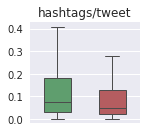

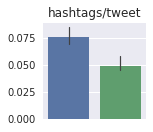

['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd']

In [129]:
sns.set()
Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(hashtags_per_tweet_NonCounter))],hashtags_per_tweet_NonCounter],columns = ['Users',''])
counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(hashtags_per_tweet_counter))],hashtags_per_tweet_counter],columns = ['Users',''])
hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(hashtags_per_tweet_hate))],hashtags_per_tweet_hate],columns = ['Users',''])
Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
print('Hate Vs Counter')
print(ttest_ind(hashtags_per_tweet_counter,hashtags_per_tweet_hate))
print(mannwhitneyu(hashtags_per_tweet_counter,hashtags_per_tweet_hate),end = '\n\n')
print('Hate Vs NonCounter')
print(ttest_ind(hashtags_per_tweet_NonCounter,hashtags_per_tweet_hate))
print(mannwhitneyu(hashtags_per_tweet_NonCounter,hashtags_per_tweet_hate),end = '\n\n')
print('Counter Vs NonCounter')
print(ttest_ind(hashtags_per_tweet_counter,hashtags_per_tweet_NonCounter))
print(mannwhitneyu(hashtags_per_tweet_counter,hashtags_per_tweet_NonCounter))
# palette = {'Counter':'darkslateblue','Hate':'crimson','NonCounter':'forestgreen'}
plt.figure(figsize=(2.2,2))
ax = sns.boxplot(x = 'Users',y ='',data = Comb_df ,showfliers = False, linewidth=1,width=0.5,palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
ax.set_xticklabels('')
plt.xlabel('')
plt.title('hashtags/tweet')
plt.tight_layout()
plt.savefig('Images/hashtagsPERtweet.eps', format='eps')
plt.show()
############################### Barplot#############################
plt.figure(figsize=(2.2,2))
ax = sns.barplot(x = 'Users',y ='',data = Comb_df,estimator = np.median,errwidth=1.2 )
ax.set_xticklabels('')
plt.title('hashtags/tweet')
plt.xlabel('')
plt.tight_layout()
plt.show()
current_palette = sns.color_palette()
current_palette.as_hex()

## Lexical and Sentiment analysis on hatespeakes and CounterSpeaker Tweets: 

* Below __Code snippet__ implements __lexicon_counter_user__,__lexicon_hate_user__,__sentiment_counter_user__ ,__sentiment_hate_user__

* __Lexical Analysis and TextBlob:__

## Interest Topics :

In [110]:
len(hate_usernames),len(counter_usernames)

(548, 1239)

In [122]:
from tqdm import tqdm
with open('output328.json','r') as fp:
    output = json.load(fp)
len_hate = len(hate_usernames.intersection(set(output.keys()))) 
len_counter = len((counter_usernames.union(Non_counter_usernames)).intersection(set(output.keys()))) 

hateuser_interests = {}
Counteruser_interests = {}
for user in output.keys():
    try:
        if user in hate_usernames:
            hateuser_interests[user]={}
            for each_category_list in output[user]['response']:
                hateuser_interests[user][each_category_list[0]] = {}
                sum_  = sum(list(each_category_list[1].values()))
                for key,value in each_category_list[1].items():
                    hateuser_interests[user][each_category_list[0]].update({key : value/sum_})
        if user in counter_usernames:
            Counteruser_interests[user]={}
            for each_category_list in output[user]['response']:
                Counteruser_interests[user][each_category_list[0]] = {}
                sum_  = sum(list(each_category_list[1].values()))
                for key,value in each_category_list[1].items():
                    Counteruser_interests[user][each_category_list[0]].update({key : value/sum_})
    except:
        pass
#------------------------------------------------------------------------------------------
hate = {}
for dict_ in hateuser_interests.values():
    for class_,values_dict in dict_.items(): 
        if class_ not in hate.keys():
                hate[class_] = {}
        else:
            for name,value in values_dict.items():
                if name not in hate[class_].keys():
                    hate[class_][name] = []
                else:
                    hate[class_][name].append(value)
counter = {}
for dict_ in Counteruser_interests.values():
    for class_,values_dict in dict_.items(): 
        if class_ not in counter.keys():
                counter[class_] = {}
        else:
            for name,value in values_dict.items():
                if name not in counter[class_].keys():
                    counter[class_][name] = []
                else:
                    counter[class_][name].append(value)
#--------------------------------------------------------------------
vocab = {}
for class_ in hate.keys():
    vocab[class_]=[i for i in set(list(hate[class_].keys())+list(counter[class_].keys()))]
    print('{}--{}'.format(class_,len(vocab[class_])))
#-------------------------------------------------------
# Binny asked Dictionary:
#Hate
for class_,topic_dict in tqdm(hate.items()):
    for topic,value in topic_dict.items():
                if hate[class_][topic]==[]:
                    hate[class_][topic].extend(np.zeros(len(hate_usernames)).tolist())
                else:
                    hate[class_][topic].extend(np.zeros(len(hate_usernames)-len(hate[class_][topic])).tolist())
for class_,topics in vocab.items():
    for name in topics:
        if name not in hate[class_].keys():
            hate[class_][name] = np.zeros(len(hate_usernames)).tolist()
#Counter            
for class_,topic_dict in tqdm(counter.items()):
    for topic,value in topic_dict.items():
                if counter[class_][topic]==[]:
                    counter[class_][topic].extend(np.zeros(len(counter_usernames)).tolist())
                else:
                    counter[class_][topic].extend(np.zeros(len(counter_usernames)-len(counter[class_][topic])).tolist())
for class_,topics in vocab.items():
    for name in topics:
        if name not in counter[class_].keys():
            counter[class_][name] = np.zeros(len(counter_usernames)).tolist()
# with open('Refined_Project_Dataset/Binny_Hate_interest_dict.json','w') as fp:
#     json.dump(hate,fp)
# with open('Refined_Project_Dataset/Binny_Counter_interest_dict.json','w') as fp:
#     json.dump(counter,fp)
# with open('Refined_Project_Dataset/Binny_Hate_interest_dict.json','r') as fp:
#     hate = json.load(fp)
# with open('Refined_Project_Dataset/Binny_Counter_interest_dict.json','r') as fp:
#     counter = json.load(fp)

100%|██████████| 3/3 [00:00<00:00, 26.16it/s]

all--1637
popular--823
niche--4573



100%|██████████| 3/3 [00:00<00:00,  8.95it/s]


In [137]:
for interest,classes in vocab.items():
    print('****************************',interest,'*******************************')
    for key in classes:
#         print(counter[interest][key])
        try:
            _,pvalue = mannwhitneyu(hate[interest][key],counter[interest][key])
            if pvalue<=0.01 and np.mean(hate[interest][key])>np.mean(counter[interest][key]) :
                print(key)
                print('Hate-Mean: {}--Median: {} | Counter-Mean: {}--Median: {}'.format(np.mean(hate[interest][key]),np.median(hate[interest][key]),np.mean(counter[interest][key]),np.median(counter[interest][key])))
                print(mannwhitneyu(hate[interest][key],counter[interest][key]),end = '\n\n')
        except:
            pass

**************************** all *******************************
bbc
Hate-Mean: 0.00015659421075130714--Median: 0.0 | Counter-Mean: 1.7764299255374202e-05--Median: 0.0
MannwhitneyuResult(statistic=337283.0, pvalue=0.008345760341552258)

ncaa
Hate-Mean: 0.00015719560992236592--Median: 0.0 | Counter-Mean: 0.0--Median: 0.0
MannwhitneyuResult(statistic=337627.5, pvalue=0.004591739919921564)

nba players
Hate-Mean: 0.0004467558107353772--Median: 0.0 | Counter-Mean: 0.0001380229936761032--Median: 0.0
MannwhitneyuResult(statistic=335564.5, pvalue=0.006813612204461781)

niggas
Hate-Mean: 0.0004345352082767713--Median: 0.0 | Counter-Mean: 0.00010200964160115918--Median: 0.0
MannwhitneyuResult(statistic=335016.0, pvalue=0.0012683928275952887)

shit
Hate-Mean: 0.0014694689615932922--Median: 0.0 | Counter-Mean: 0.0008069067061101916--Median: 0.0
MannwhitneyuResult(statistic=331599.5, pvalue=0.008206764033900681)

tube
Hate-Mean: 0.0011194900705917643--Median: 0.0 | Counter-Mean: 0.0003986441166764

In [124]:
# lexicon_hate_user = []
# lexicon_counter_user = []
# # lexicon_Noncounter_user = []
# for name,tweets in all_user_tweets.items():
#     ind_tweets = ' '.join(tweets)    ###### all tweets for particular user
#     if name.strip() in hate_usernames:
#         lexicon_hate_user.append([ind_tweets,1])
# #         lexicon_hate_user[name] = lexicon.analyze(ind_tweets,normalize = True)
#     elif name.strip() in list(counter_usernames)+list(Non_counter_usernames):
#         lexicon_counter_user.append([ind_tweets,0])
#         lexicon_counter_user[name] = lexicon.analyze(ind_tweets,normalize = True)
#     elif name.strip() in Non_counter_usernames:
#         lexicon_Noncounter_user[name] = lexicon.analyze(ind_tweets,normalize = True)
#-----------------------------------------------------------------------------------------------------------------#
# from textblob import TextBlob
# textblob_hate_user = {}
# textblob_counter_user = {}
# textblob_Noncounter_user = {}
# for counter,(name,tweets) in enumerate(all_user_tweets.items()):
#     print(counter)
#     ind_tweets = ' '.join(tweets)    ###### all tweets for particular user
#     if name.strip() in hate_usernames:
#         textblob_hate_user[name] = {'polarity':TextBlob(ind_tweets).sentiment.polarity,'subjectivity':TextBlob(ind_tweets).sentiment.subjectivity}
#     elif name.strip() in counter_usernames:
#         textblob_counter_user[name] = {'polarity':TextBlob(ind_tweets).sentiment.polarity,'subjectivity':TextBlob(ind_tweets).sentiment.subjectivity}
#     elif name.strip() in Non_counter_usernames:
#         textblob_Noncounter_user[name] = {'polarity':TextBlob(ind_tweets).sentiment.polarity,'subjectivity':TextBlob(ind_tweets).sentiment.subjectivity}
# --------------------------------------------------------------------------------------------------------
# with open('All_hate_tweets_with_labels.pkl','wb') as fp:
#     pickle.dump(lexicon_hate_user,fp)
# with open('All_counter_tweets_with_labels.pkl','wb') as fp:
#     pickle.dump(lexicon_counter_user,fp)

In [44]:
len(textblob_hate_user)

509

* __Sentiment Analysis __/__Profane Words Distribution__

In [45]:
# Profane_Words = np.loadtxt('Refined_Project_Dataset/ProfaneWords.csv',dtype = str,delimiter = ',')
# profane_hate_user = []
# profane_counter_user = []
# profane_Noncounter_user = []
# # profane_user_dict = {}
# # sentiment_hate_user = {}
# # sentiment_counter_user = {}
# # sentiment_Noncounter_user = {}
# for line_counter,(name,tweets) in enumerate(all_user_tweets.items()):
# #     ind_tweets = ' '.join(tweets)
#     counter = 0
#     if name.strip() in hate_usernames:
#         print(line_counter,name)
# #         Hneg,Hneu,Hpos,Hcomp = 0,0,0,0
#         for tweet in tweets:
#             for word in Profane_Words:
#                 if len(re.findall(word,tweet.lower()))!=0:
#                     counter+=1
#                     break
#         print(counter)
#         profane_hate_user.append(counter/len(tweets))
# #         print(profane_user_dict)
# #             sentiment = sentiment_analyzer.polarity_scores(each_tweet)
# #             Hneg += sentiment['neg']
# #             Hneu += sentiment['neu']
# #             Hpos += sentiment['pos']
# #             Hcomp += sentiment['compound']
# #         sentiment_hate_user[name] = {'neg':Hneg/len(tweets),'neu': Hneu/len(tweets),'pos':Hpos/len(tweets),'compound':Hcomp/len(tweets)}
        
#     elif name.strip() in counter_usernames:
#         print(line_counter,name)
#         for tweet in tweets:
#             for word in Profane_Words:
#                 if len(re.findall(word,tweet.lower()))!=0:
#                     counter+=1
#                     break
#         print(counter)
#         profane_counter_user.append(counter/len(tweets))
# #         Cneg,Cneu,Cpos,Ccomp = 0,0,0,0
# #         for word in Profane_Words:
# #             profane_user_dict[word] = float(len(re.findall(word,ind_tweets.lower())))/len(tweets)
# # #             print(len(re.findall(word,ind_tweets.lower())),end ='.')
# #         profane_counter_user[name]=  profane_user_dict
# #             sentiment = sentiment_analyzer.polarity_scores(each_tweet)
# #             Cneg += sentiment['neg']
# #             Cneu += sentiment['neu']
# #             Cpos += sentiment['pos']
# #             Ccomp += sentiment['compound']
# #         sentiment_counter_user[name] = {'neg':Cneg/len(tweets),'neu': Cneu/len(tweets),'pos':Cpos/len(tweets),'compound':Ccomp/len(tweets)}
#     elif name.strip() in Non_counter_usernames:
#         print(line_counter,name)
#         for tweet in tweets:
#             for word in Profane_Words:
#                 if len(re.findall(word,tweet.lower()))!=0:
#                     counter+=1
#                     break
#         print(counter)
#         profane_Noncounter_user.append(counter/len(tweets))
# #         NCneg,NCneu,NCpos,NCcomp = 0,0,0,0
# #         for word in Profane_Words:
# #             profane_user_dict[word] = float(len(re.findall(word,ind_tweets.lower())))/len(tweets)
# # #             print(len(re.findall(word,ind_tweets.lower())),end ='.')
# #         profane_Noncounter_user[name]=  profane_user_dict
# #             sentiment = sentiment_analyzer.polarity_scores(each_tweet)
# #             NCneg += sentiment['neg']
# #             NCneu += sentiment['neu']
# #             NCpos += sentiment['pos']
# #             NCcomp += sentiment['compound']
# #         sentiment_Noncounter_user[name] = {'neg':NCneg/len(tweets),'neu': NCneu/len(tweets),'pos':NCpos/len(tweets),'compound':NCcomp/len(tweets)}

In [28]:
####### Profane mean
np.mean(profane_hate_user),np.mean(profane_counter_user),np.mean(profane_Noncounter_user)

(0.15257017355756078, 0.13237973840471354, 0.1603729497418059)

In [29]:
####### Profane median
np.median(profane_hate_user),np.median(profane_counter_user),np.median(profane_Noncounter_user)

(0.14411302982731555, 0.11881031792057731, 0.149438202247191)

Hate----Counter
MannwhitneyuResult(statistic=1154.0, pvalue=0.047741239297343474)

Counter----NonCounter
MannwhitneyuResult(statistic=609.0, pvalue=0.031434494068282796)

Hate----NonCounter
MannwhitneyuResult(statistic=234.0, pvalue=0.3923935434248835)


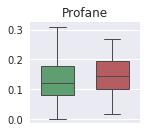

In [130]:
print('Hate----Counter')
print(mannwhitneyu(profane_hate_user,profane_counter_user),end='\n\n')
print('Counter----NonCounter')
print(mannwhitneyu(profane_Noncounter_user,profane_counter_user),end='\n\n')
print('Hate----NonCounter')
print(mannwhitneyu(profane_Noncounter_user,profane_hate_user))
######################## Profane Images ############################
Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(profane_Noncounter_user))],profane_Noncounter_user],columns = ['Users',''])
counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(profane_counter_user))],profane_counter_user],columns = ['Users',''])
hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(profane_hate_user))],profane_hate_user],columns = ['Users',''])
Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
plt.figure(figsize = (2.2,2))
ax  = sns.boxplot(x = 'Users',y ='',data = Comb_df, linewidth=1,width=0.6,showfliers = False,palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_title('Profane')
plt.tight_layout()
plt.savefig('Images/Profane.eps', format='eps')
plt.show()

#### This code is for writing the above created lexicon and sentiment dictionaries into pkl files so as speed up their importing as well as saving memory : 

In [48]:
list(textblob_hate_user.values())[0]

{'polarity': 0.11299070730567451, 'subjectivity': 0.5946555603785325}

In [41]:
# with open('Refined_Project_Dataset/lexicon_hate_user.pkl','wb') as fp:
#     pickle.dump(lexicon_hate_user,fp)
# with open('Refined_Project_Dataset/lexicon_counter_user.pkl','wb') as fp:
#     pickle.dump(lexicon_counter_user,fp)
# with open('Refined_Project_Dataset/lexicon_Noncounter_user.pkl','wb') as fp:
#     pickle.dump(lexicon_Noncounter_user,fp)
# with open('Refined_Project_Dataset/textblob_hate_user.pkl','wb') as fp:
#     pickle.dump(textblob_hate_user,fp)
# with open('Refined_Project_Dataset/textblob_counter_user.pkl','wb') as fp:
#     pickle.dump(textblob_counter_user,fp)
# with open('Refined_Project_Dataset/textblob_Noncounter_user.pkl','wb') as fp:
#     pickle.dump(textblob_Noncounter_user,fp)
# with open('Refined_Project_Dataset/sentiment_hate_user.pkl','wb') as fp:
#     pickle.dump(sentiment_hate_user,fp)
# with open('Refined_Project_Dataset/sentiment_counter_user.pkl','wb') as fp:
#     pickle.dump(sentiment_counter_user,fp)
# with open('Refined_Project_Dataset/sentiment_Noncounter_user.pkl','wb') as fp:
# #     pickle.dump(sentiment_Noncounter_user,fp)
# with open('Refined_Project_Dataset/profane_hate_user.pkl','wb') as fp:
#     pickle.dump(profane_hate_user,fp)
# with open('Refined_Project_Dataset/profane_counter_user.pkl','wb') as fp:
#     pickle.dump(profane_counter_user,fp)
# with open('Refined_Project_Dataset/profane_Noncounter_user.pkl','wb') as fp:
#     pickle.dump(profane_Noncounter_user,fp)

In [49]:
len(textblob_Noncounter_user.keys()), len(textblob_counter_user.keys())

(188, 1155)

## Creating a lexicon DataFrame for all Users : 

In [32]:
lexicon_dataframe = pd.DataFrame(list(lexicon_hate_user.values())+list(lexicon_counter_user.values())+list(lexicon_Noncounter_user.values()))
lexicon_dataframe.index = list(lexicon_hate_user.keys())+list(lexicon_counter_user.keys())+list(lexicon_Noncounter_user.keys())
print(lexicon_dataframe.shape)
lexicon_dataframe.head(2)

(1852, 194)


,achievement,affection,aggression,air_travel,alcohol,ancient,anger,animal,anonymity,anticipation,...,wealthy,weapon,weather,wedding,white_collar_job,work,worship,writing,youth,zest
crasykayla,0.001277,0.003922,0.000578,0.000304,0.002675,0.000426,0.000334,0.001186,0.000061,0.000061,...,0.000638,0.000426,0.000760,0.003435,0.000578,0.002797,0.000912,0.001064,0.003618,0.000426
falestiniie,0.000742,0.003292,0.001361,0.000569,0.001559,0.000841,0.000272,0.001138,0.000049,0.000124,...,0.000965,0.001757,0.000742,0.002896,0.001015,0.003242,0.000866,0.001510,0.004405,0.000346


* __lexWords_counter/hate__ are numpy arrays which lexicon contains values corresponding to names_analyized for each counter speaker and hate speaker respectively.

In [33]:
# names_analyized  = ['sadness','fear','swearing_terms','independence','government','love',
#                'positive_emotion','negative_emotion','warmth','ridicule','masculine',
#                'feminine','violence','suffering','dispute','anger','envy','work','leader',
#                'politics','terrorism','shame','confusion','hate']
lexWords_counter = lexicon_dataframe.loc[lexicon_counter_user.keys()].values
lexWords_hate = lexicon_dataframe.loc[lexicon_hate_user.keys()].values
lexWords_Noncounter = lexicon_dataframe.loc[lexicon_Noncounter_user.keys()].values

In [34]:
lexWords_Noncounter

array([[0.00253187, 0.00088321, 0.00088321, ..., 0.00079489, 0.00288515,
        0.00011776],
       [0.00171051, 0.00075159, 0.00054425, ..., 0.00142542, 0.00194376,
        0.00012958],
       [0.00231481, 0.00195738, 0.00175313, ..., 0.00376157, 0.00163399,
        0.00027233],
       ...,
       [0.00162961, 0.00310763, 0.00070743, ..., 0.00131379, 0.00333502,
        0.00018949],
       [0.001654  , 0.00060434, 0.00114507, ..., 0.00155857, 0.00143134,
        0.00012723],
       [0.00127798, 0.00058718, 0.00131252, ..., 0.00072534, 0.00079442,
        0.00010362]])

## Checking out p-values for each category :

In [36]:
useful_categories = np.loadtxt('Useful_Categories.txt',dtype = str)
useful_categories = set(useful_categories)-(set(['confusion','divine','emotional','healing'
                    ,'kill','joy','love','nervousness','optimism','positive_emotion','suffering'
                    ,'appearance','horror','monster','ugliness','zest','worship','shame',
                    'affection']))
useful_categories = list(useful_categories)
len(useful_categories)

27

In [37]:
for j in useful_categories:
    _,pvalue1 = ttest_ind(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j])
    _,pvalue2 = mannwhitneyu(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j])
    _,pvalue3 = ttest_ind(lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j])
    _,pvalue4 = mannwhitneyu(lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j])
    _,pvalue5 = ttest_ind(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j])
    _,pvalue6 = mannwhitneyu(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j])
    print("                                                     ",j)
    print('Hate----Counter')
    print(ttest_ind(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j]))
    print(mannwhitneyu(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j]))
    print('Hate-----NonCounter')
    print(ttest_ind(lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j]))
    print(mannwhitneyu(lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j]))
    print()
    print('Counter----NonCounter')
    print(ttest_ind(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j]))
    print(mannwhitneyu(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j]))
    print()

                                                      envy
Hate----Counter
Ttest_indResult(statistic=-2.9609556638828907, pvalue=0.003110338464491982)
MannwhitneyuResult(statistic=227380.0, pvalue=8.490165409995618e-14)
Hate-----NonCounter
Ttest_indResult(statistic=-1.4347025955404678, pvalue=0.1518216800245145)
MannwhitneyuResult(statistic=33938.0, pvalue=1.8746212022019364e-09)

Counter----NonCounter
Ttest_indResult(statistic=0.7512952980023908, pvalue=0.45260678091458717)
MannwhitneyuResult(statistic=104105.0, pvalue=0.1826375956634001)

                                                      law
Hate----Counter
Ttest_indResult(statistic=5.032114058903994, pvalue=5.376920559734352e-07)
MannwhitneyuResult(statistic=258884.5, pvalue=5.16095357624846e-05)
Hate-----NonCounter
Ttest_indResult(statistic=2.6715003230958256, pvalue=0.00772813284359532)
MannwhitneyuResult(statistic=39366.0, pvalue=0.00016258855069201754)

Counter----NonCounter
Ttest_indResult(statistic=1.2662408232026472, pval

Ttest_indResult(statistic=0.38941789158605217, pvalue=0.6970863312017319)
MannwhitneyuResult(statistic=41686.5, pvalue=0.004498962899892931)

Counter----NonCounter
Ttest_indResult(statistic=1.3016270887783485, pvalue=0.1932674528326792)
MannwhitneyuResult(statistic=106023.0, pvalue=0.302610111338193)

                                                      politeness
Hate----Counter
Ttest_indResult(statistic=-0.6099349200808981, pvalue=0.5419882998457117)
MannwhitneyuResult(statistic=271824.0, pvalue=0.007146776088372802)
Hate-----NonCounter
Ttest_indResult(statistic=0.5022809713223286, pvalue=0.615628990763603)
MannwhitneyuResult(statistic=47335.5, pvalue=0.414424615703828)

Counter----NonCounter
Ttest_indResult(statistic=-0.7424720371081706, pvalue=0.457931419013598)
MannwhitneyuResult(statistic=99273.0, pvalue=0.029686579925602065)

                                                      anger
Hate----Counter
Ttest_indResult(statistic=3.478151047906045, pvalue=0.0005178973212783461)
Man

/home/navish/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


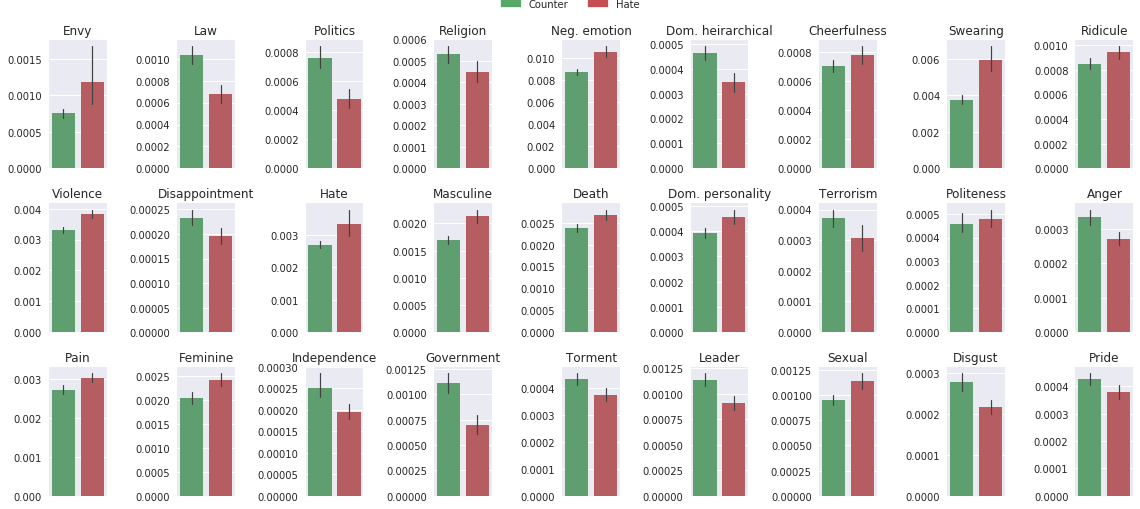

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

<Figure size 158.4x144 with 0 Axes>

In [38]:
%matplotlib inline
sns.set(palette = 'deep')
# for i,j in enumerate(list(names_analyized)):
f,axes = plt.subplots(3,9,figsize = (16,7))
row,col = 0,0
for j in useful_categories:
#     _,pvalue1 = ttest_ind(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j])
#     _,pvalue2 = mannwhitneyu(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j])
#      _,pvalue3 = ttest_ind(lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j])
#     _,pvalue4 = mannwhitneyu(lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j])
#     _,pvalue5 = ttest_ind(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j])
#     _,pvalue6 = mannwhitneyu(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j])
#     if  pvalue2 < 0.01 or pvalue4 < 0.01 or pvalue6 < 0.01:
#             useful_categories.append(j)
#             print("                                                     ",j)
#             print('Hate----Counter')
#             print(ttest_ind(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j]))
#             print(mannwhitneyu(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j]))
# #             print('           Hate Vs NonCounter')
# #             print(ttest_ind(lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j]))
# #             print(mannwhitneyu(lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j],lexicon_dataframe.loc[lexicon_hate_user.keys()][j]))
#             print()
#             print('Counter----NonCounter')
#             print(ttest_ind(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j]))
#             print(mannwhitneyu(lexicon_dataframe.loc[lexicon_counter_user.keys()][j],lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j]))
#             print()
            Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(lexicon_Noncounter_user.keys()))],lexicon_dataframe.loc[lexicon_Noncounter_user.keys()][j].tolist()],columns = ['Users',''])
            counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(lexicon_counter_user.keys()))],lexicon_dataframe.loc[lexicon_counter_user.keys()][j].tolist()],columns = ['Users',''])
            hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(lexicon_hate_user.keys()))],lexicon_dataframe.loc[lexicon_hate_user.keys()][j].tolist()],columns = ['Users',''])
            Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
            Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
#             palette = {'Counter':'midnightblue','Hate':'crimson','NonCounter':'forestgreen'}
            plt.figure(figsize=(2.2,2))
            sns.barplot(x = 'Users',y ='',data = Comb_df ,errwidth = 1.2,ax = axes[row,col],palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
            axes[row,col].set_xticklabels('')
            axes[row,col].set_xlabel('')
            if '_' in re.findall(r'\w',j):
                if len(re.findall('[^_]+',j)[0])>3 and re.findall(r'[^_]+',j)[1]!='terms':
                    axes[row,col].set_title(re.findall(r'[^_]+',j)[0][0].upper()+re.findall(r'[^_]+',j)[0][1:3]+'.'+' '+re.findall(r'[^_]+',j)[1])
                else:
                    if re.findall(r'[^_]+',j)[1]=='terms':
                        axes[row,col].set_title(re.findall(r'[^_]+',j)[0][0].upper()+re.findall(r'[^_]+',j)[0][1:])
                    else:
                        print(re.findall(r'[^_]+',j)[1])
                        axes[row,col].set_title(re.findall(r'[^_]+',j)[0][0].upper()+re.findall(r'[^_]+',j)[0][1:]+' '+re.findall(r'[^_]+',j)[1]) 
            else:
                axes[row,col].set_title(j[0].upper()+j[1:])
            col+=1
            if col==9:
                row+=1
                col=0
            if row==3:
                break
#             def change_width(ax, new_value) :
#                 for patch in ax.patches :
#                     current_width = patch.get_width()
#                     diff = current_width - new_value

#                     # we change the bar width
#                     patch.set_width(new_value)

#                     # we recenter the bar
#                     patch.set_x(patch.get_x() + diff * .5)

#             change_width(ax, .4)
#             plt.savefig('Images/empath_'+ j +'.eps', format='eps') 
f.subplots_adjust(top=10)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
red_patch = mpatches.Patch(color='#c44e52', label='Hate')
blue_patch = mpatches.Patch(color='#4c72b0', label='NonCounter')
green_patch = mpatches.Patch(color='#55a868', label='Counter')
f.legend(handles=[green_patch,red_patch],loc=9,ncol=3, frameon=False, borderaxespad =-0.45)

f.tight_layout()
f.savefig('Images/empath.eps',format='eps')
plt.show()

## Creating a Sentiment DataFrame/TextBlob DataFrame for all Users : 

In [65]:
sentiment_dataframe = pd.DataFrame(list(sentiment_hate_user.values())+list(sentiment_counter_user.values())+list(sentiment_Noncounter_user.values()))
sentiment_dataframe.index = list(sentiment_hate_user.keys())+list(sentiment_counter_user.keys())+list(sentiment_Noncounter_user.keys())
print(sentiment_dataframe.shape)
sentiment_dataframe.head(2)

(1852, 4)


,compound,neg,neu,pos
crasykayla,0.060108,0.110590,0.740262,0.149144
falestiniie,0.011887,0.095849,0.792552,0.111597


In [66]:
list(textblob_hate_user.values())[0]

{'polarity': 0.11299070730567451, 'subjectivity': 0.5946555603785325}

In [67]:
textblob_dataframe = pd.DataFrame(list(textblob_hate_user.values())+list(textblob_counter_user.values())+list(textblob_Noncounter_user.values()))
textblob_dataframe.index = list(textblob_hate_user.keys())+list(textblob_counter_user.keys())+list(textblob_Noncounter_user.keys())
print(textblob_dataframe.shape)
textblob_dataframe.head(2)

(1852, 2)


,polarity,subjectivity
crasykayla,0.112991,0.594656
falestiniie,0.044500,0.542153


* __senWords_counter/hate__ are numpy arrays which contains sentiment values corresponding to each user.

In [68]:
senWords_counter = sentiment_dataframe.loc[sentiment_counter_user.keys()].values
senWords_hate = sentiment_dataframe.loc[sentiment_hate_user.keys()].values
senWords_Noncounter = sentiment_dataframe.loc[sentiment_Noncounter_user.keys()].values
#--------------------------------------------------------------------------------------------------
textblob_counter = textblob_dataframe.loc[textblob_counter_user.keys()].values
textblob_hate = textblob_dataframe.loc[textblob_hate_user.keys()].values
textblob_Noncounter = textblob_dataframe.loc[textblob_Noncounter_user.keys()].values

In [69]:
# senWords_counter
textblob_counter

array([[0.30403886, 0.59109541],
       [0.10960933, 0.54541847],
       [0.16809592, 0.58320833],
       ...,
       [0.07356571, 0.57161889],
       [0.14583333, 0.46666667],
       [0.0075    , 0.50333333]])

# Sentiment Plotting 

### T-Test on Sentiment Values:

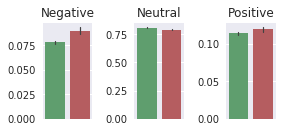

In [134]:
sns.set(palette = 'deep')
f,axes = plt.subplots(1,3,figsize = (4,2))
col = 0
for i,j in enumerate(['Compound','Negative','Neutral','Positive']):
        _,pvalue1 = mannwhitneyu(senWords_counter[:,i],senWords_hate[:,i])
        _,pvalue2 = mannwhitneyu(senWords_Noncounter[:,i],senWords_hate[:,i])
        _,pvalue3 = mannwhitneyu(senWords_counter[:,i],senWords_Noncounter[:,i])
        if pvalue1<0.01 or pvalue2<0.01 or pvalue3<0.01:
#             print('                                      ',j)
#             print('Hate----Counter')
#             print(ttest_ind(senWords_counter[:,i],senWords_hate[:,i]))
#             print(mannwhitneyu(senWords_counter[:,i],senWords_hate[:,i]))
#             print()
#             print('Counter----Non Counter')
#             print(ttest_ind(senWords_counter[:,i],senWords_Noncounter[:,i]))
#             print(mannwhitneyu(senWords_counter[:,i],senWords_Noncounter[:,i]))
#             print()
#             print('Hate----Non Counter')
#             print(ttest_ind(senWords_hate[:,i],senWords_Noncounter[:,i]))
#             print(mannwhitneyu(senWords_hate[:,i],senWords_Noncounter[:,i]))
            Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(senWords_Noncounter[:,i]))],senWords_Noncounter[:,i]],columns = ['Users',''])
            counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(senWords_counter[:,i]))],senWords_counter[:,i]],columns = ['Users',''])
            hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(senWords_hate[:,i]))],senWords_hate[:,i]],columns = ['Users',''])
            Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
            Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
#             sns.boxplot(x = 'Users',y ='',data = Comb_df, linewidth=1,width=0.6,showfliers = False,ax = axes[col])
#             axes[col].set_xticklabels('')
#             axes[col].set_xlabel('')
#             axes[col].set_title(j[0].upper()+j[1:])
# #             col+=1
# f.tight_layout()
# f.savefig('Images/sentiment_Boxplots.eps', format='eps')
# plt.show()
######################################### Barplot##################################### 
            sns.barplot(x = 'Users',y ='',data = Comb_df,errwidth=1.2,ax =axes[col],palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
            axes[col].set_xticklabels('')
            axes[col].set_xlabel('')
            axes[col].set_title(j[0].upper()+j[1:])
            col+=1
            
f.tight_layout()
f.savefig('Images/sentiment_Barplots.eps', format='eps')
plt.show()

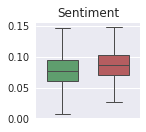

In [135]:
Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(senWords_Noncounter[:,1]))],senWords_Noncounter[:,1]],columns = ['Users',''])
counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(senWords_counter[:,1]))],senWords_counter[:,1]],columns = ['Users',''])
hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(senWords_hate[:,1]))],senWords_hate[:,1]],columns = ['Users',''])
Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
plt.figure(figsize = (2.2,2))
ax  = sns.boxplot(x = 'Users',y ='',data = Comb_df, linewidth=1,width=0.6,showfliers = False,palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_title('Sentiment')
plt.tight_layout()
plt.savefig('Images/Negative.eps', format='eps')
plt.show()

                                       polarity
Hate----Counter
Ttest_indResult(statistic=2.455632421009419, pvalue=0.01416543976209231)
MannwhitneyuResult(statistic=280752.0, pvalue=0.07201104403840128)

Counter----Non Counter
Ttest_indResult(statistic=-0.10917902957438345, pvalue=0.9130768274045733)
MannwhitneyuResult(statistic=105050.0, pvalue=0.23771329166729888)

Hate----Non Counter
Ttest_indResult(statistic=-1.8310454896268553, pvalue=0.06752171728197422)
MannwhitneyuResult(statistic=44008.0, pvalue=0.05191393849464162)
                                       subjectivity
Hate----Counter
Ttest_indResult(statistic=-6.542568233560775, pvalue=8.029660681731519e-11)
MannwhitneyuResult(statistic=235308.0, pvalue=4.21773148920915e-11)

Counter----Non Counter
Ttest_indResult(statistic=0.45801599519250924, pvalue=0.6470151553258225)
MannwhitneyuResult(statistic=105192.0, pvalue=0.24670885296358674)

Hate----Non Counter
Ttest_indResult(statistic=4.12135249781638, pvalue=4.22115463931937e-0

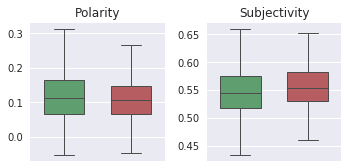

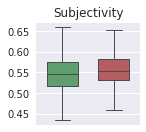

In [136]:
f,axes = plt.subplots(1,2,figsize = (5,2.5))
col = 0
for i,j in enumerate(['polarity','subjectivity']):
        _,pvalue1 = mannwhitneyu(textblob_counter[:,i],textblob_hate[:,i])
        _,pvalue2 = mannwhitneyu(textblob_Noncounter[:,i],textblob_hate[:,i])
        _,pvalue3 = mannwhitneyu(textblob_counter[:,i],textblob_Noncounter[:,i])
        if pvalue1<0.1 or pvalue2<0.1 or pvalue3<0.1:
            print('                                      ',j)
            print('Hate----Counter')
            print(ttest_ind(senWords_counter[:,i],senWords_hate[:,i]))
            print(mannwhitneyu(senWords_counter[:,i],senWords_hate[:,i]))
            print()
            print('Counter----Non Counter')
            print(ttest_ind(senWords_counter[:,i],senWords_Noncounter[:,i]))
            print(mannwhitneyu(senWords_counter[:,i],senWords_Noncounter[:,i]))
            print()
            print('Hate----Non Counter')
            print(ttest_ind(senWords_hate[:,i],senWords_Noncounter[:,i]))
            print(mannwhitneyu(senWords_hate[:,i],senWords_Noncounter[:,i]))
            Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(textblob_Noncounter[:,i]))],textblob_Noncounter[:,i]],columns = ['Users',''])
            counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(textblob_counter[:,i]))],textblob_counter[:,i]],columns = ['Users',''])
            hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(textblob_hate[:,i]))],textblob_hate[:,i]],columns = ['Users',''])
            Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
            Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
            sns.boxplot(x = 'Users',y ='',data = Comb_df, linewidth=1,width=0.6,showfliers = False,ax = axes[col],palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
            axes[col].set_xticklabels('')
            axes[col].set_xlabel('')
            axes[col].set_title(j[0].upper()+j[1:])
            col+=1
f.tight_layout()
f.savefig('Images/TextBlob_Boxplots.eps', format='eps')
plt.show()
######################################### Barplot##################################### 
#             sns.barplot(x = 'Users',y ='',data = Comb_df,errwidth=1.2,ax =axes[col])
#             axes[col].set_xticklabels('')
#             axes[col].set_xlabel('')
#             axes[col].set_title(j[0].upper()+j[1:])
#             col+=1
# f.tight_layout()
# f.savefig('Images/sentiment_Barplots', format='eps')
# plt.show()
Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(textblob_Noncounter[:,1]))],textblob_Noncounter[:,1]],columns = ['Users',''])
counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(textblob_counter[:,1]))],textblob_counter[:,1]],columns = ['Users',''])
hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(textblob_hate[:,1]))],textblob_hate[:,1]],columns = ['Users',''])
Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
plt.figure(figsize = (2.2,2))
ax = sns.boxplot(x = 'Users',y ='',data = Comb_df, linewidth=1,width=0.6,showfliers = False,palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
ax.set_xticklabels('')
ax.set_xlabel('')
ax.set_title('Subjectivity')
plt.tight_layout()
plt.savefig('Images/Subjectivity.eps', format='eps')
plt.show()

* user_tweetid.pkl :: Contains tweet ids coressponding to each user name that it has tweeted

In [73]:
with open('Refined_Project_Dataset/user_tweetid.pkl','rb') as f:
    names = pickle.load(f).keys()
len(names) ##### user names foundout during crawling

1852

### missing_values either due to account deletion or protected mode or warning time not exceeded.

In [74]:
print(len(all_usernames))
missing_values  = [i for i in set(all_usernames)-set(names)]
len(missing_values)

1972


120

In [75]:
# with open('Refined_Project_Dataset/missing_users_binny.txt','w') as fp:
temp_missing = [i for i in set(all_usernames)-set(names)]
#     print(len(temp_missing))
#     for i in temp_missing:
#         fp.write(i)
#         fp.write('\n')

In [76]:
##### Distribution of missing users among hate , counter and Non-Counter.
len(set(temp_missing).intersection(counter_usernames)), len(set(temp_missing).intersection(hate_usernames)),len(set(temp_missing).intersection(Non_counter_usernames))

(66, 39, 16)

### Finding out to which category missing counterspeech belong:

In [77]:
missing_counter_labels = []
missing_hate_labels = []
missing_Noncounter_labels = []
for i in counter_usernames:
    if i in temp_missing:
        missing_counter_labels.append(df[df['replier_user_name']== i]['tag'].values[0])

for i in hate_usernames:
    if i in temp_missing:
        missing_hate_labels.append(df[df['original_tweetusername']== i]['tag'].values[0])

for i in Non_counter_usernames:
    if i in temp_missing:
        missing_Noncounter_labels.append(df[df['replier_user_name']== i]['tag'].values[0])
# np.savetxt('missing_counter_labels.txt',missing_counter_labels,fmt = '%s') 
# np.savetxt('missing_hate_labels.txt',missing_hate_labels,fmt = '%s') 

In [78]:
categories = ['0','1','2','3','4','5','6','7','8','9','11']
dict_counter = {}
dict_hate = {}
for i in categories:
    dict_counter[i] = (re.findall(r'\d+',(' '.join(missing_counter_labels)))).count(i)
                
for i in categories:
    dict_hate[i] = (re.findall(r'\d+',(' '.join(missing_hate_labels)))).count(i)

* Distribution of __categories in missing counter speeches__:

In [79]:
dict_counter

{'0': 0,
 '1': 7,
 '2': 5,
 '3': 6,
 '4': 2,
 '5': 11,
 '6': 15,
 '7': 8,
 '8': 8,
 '9': 9,
 '11': 8}

In [80]:
dict_hate

{'0': 7,
 '1': 1,
 '2': 3,
 '3': 3,
 '4': 2,
 '5': 4,
 '6': 5,
 '7': 2,
 '8': 5,
 '9': 10,
 '11': 4}

In [81]:
len(set(temp_missing)),len(set(hate_usernames)),len(counter_usernames),len(Non_counter_usernames)

(120, 548, 1239, 220)

## % Missing Hate speakers and counter speakers:

In [82]:
print('Percentage of Hatespeech missing',39/548)
print('Percentage of Counterspeech missing',66/1239)
print('Percentage of Non-Counterspeech missing',16/220)

Percentage of Hatespeech missing 0.07116788321167883
Percentage of Counterspeech missing 0.053268765133171914
Percentage of Non-Counterspeech missing 0.07272727272727272


### user_info_characteristics.json : Contains all user information.

In [ ]:
with open('Refined_Project_Dataset/user_info.pkl','rb') as fp:
    data = pickle.load(fp)
# user_info_characteristics = []
# for value,tweets in zip(data.values(),all_user_tweets.values()):
#     value.update({'num_tweets':len(tweets)})
#     user_info_characteristics.append(value)
# with open('Refined_Project_Dataset/user_info_characteristics.json','w') as fp:
#     json.dump(user_info_characteristics,fp)
    
## Creating DataFrame : 
user_info_characteristics = pd.read_json('Refined_Project_Dataset/user_info_characteristics.json')
user_info_characteristics.head(1)

## Finding out the total count / list of Followers...  for all the users combined

In [84]:
followers_count_Hate_list,friends_count_Hate_list,listed_count_Hate_list,favourites_count_Hate_list,statuses_count_Hate_list = [],[],[],[],[]
followers_count_Counter_list,friends_count_Counter_list,listed_count_Counter_list,statuses_count_Counter_list,favourites_count_Counter_list = [],[],[],[],[]
followers_count_NonCounter_list,friends_count_NonCounter_list,listed_count_NonCounter_list,statuses_count_NonCounter_list,favourites_count_NonCounter_list = [],[],[],[],[]

for key in names:
    if key.lower().strip() in [i.lower().strip() for i in hate_usernames]:
        followers_count_Hate_list.append(data[key]['followers_count'])
        friends_count_Hate_list.append(data[key]['friends_count'])
        listed_count_Hate_list.append(data[key]['listed_count'])
        favourites_count_Hate_list.append(data[key]['favourites_count'])
        statuses_count_Hate_list.append(data[key]['statuses_count'])
    
for key in names:
    if key.lower().strip() in [i.lower().strip() for i in counter_usernames]:
        followers_count_Counter_list.append(data[key]['followers_count'])
        friends_count_Counter_list.append(data[key]['friends_count'])
        listed_count_Counter_list.append(data[key]['listed_count'])
        favourites_count_Counter_list.append(data[key]['favourites_count'])
        statuses_count_Counter_list.append(data[key]['statuses_count'])

            
for key in names:
    if key.lower().strip() in [i.lower().strip() for i in Non_counter_usernames]:
        followers_count_NonCounter_list.append(data[key]['followers_count'])
        friends_count_NonCounter_list.append(data[key]['friends_count'])
        listed_count_NonCounter_list.append(data[key]['listed_count'])
        favourites_count_NonCounter_list.append(data[key]['favourites_count'])
        statuses_count_NonCounter_list.append(data[key]['statuses_count'])


In [85]:
#####CAUTION : Please do not run this as such,first do required changes in above function 
# print(followers_count_Hate,friends_count_Hate,listed_count_Hate,favourites_count_Hate,statuses_count_Hate)
# print(followers_count_Counter,friends_count_Counter,listed_count_Counter,favourites_count_Counter,statuses_count_Counter)

### Total no of intersection points in craawled data and the original data:

In [86]:
## length of common elements without lowercasing for checking:
len(set([i.lower().strip() for i in data.keys()]).intersection(set([i.lower().strip() for i in list(hate_usernames)+list(counter_usernames)+list(Non_counter_usernames)])))

1852

# T-Test :

### Modying features of DataFrame to get numerical data: 

In [87]:
#### Getting only dates from creation date and time column.
def get_dates(d):
    d = str(d)
    date = []
    date.append(re.findall(r'\w\w\w\w-\w+-\w\w',d)[0])
    return date
user_info_characteristics['date'] = user_info_characteristics['created_at'].apply(get_dates)

## modyfying features :

user_info_characteristics['default_profile'] = user_info_characteristics['default_profile'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['default_profile_image'] = user_info_characteristics['default_profile_image'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['verified'] = user_info_characteristics['verified'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['protected'] = user_info_characteristics['protected'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['geo_enabled'] = user_info_characteristics['geo_enabled'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['contributors_enabled'] = user_info_characteristics['contributors_enabled'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['is_translator'] = user_info_characteristics['is_translator'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['is_translation_enabled'] = user_info_characteristics['is_translation_enabled'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['profile_background_tile'] = user_info_characteristics['profile_background_tile'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['profile_use_background_image'] = user_info_characteristics['profile_use_background_image'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['has_extended_profile'] = user_info_characteristics['has_extended_profile'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['default_profile'] = user_info_characteristics['default_profile'].apply(lambda x: 1 if x ==True else 0)
user_info_characteristics['default_profile_image'] = user_info_characteristics['default_profile_image'].apply(lambda x: 1 if x ==True else 0)

user_info_characteristics.index = data.keys()

* Creating  __user_temp__ DataFrame just to store user features to be used for analysis

In [ ]:
user_info_characteristics.head(1)

In [ ]:
user_temp = user_info_characteristics[['verified','protected','description','contributors_enabled','geo_enabled','has_extended_profile','default_profile','favourites_count','followers_count','statuses_count','friends_count','listed_count','num_tweets','withheld_in_countries','date']]
user_temp['followers_count/friends_count']= user_temp['followers_count']/user_temp['friends_count']

* __Lexical_Analysis : EMPATH__ and __Sentiment_Analysis:VADER__

In [90]:
# user_temp['sentiment_score'] = user_temp['description'].apply(lambda x:sentiment_analyzer.polarity_scores(x))
# user_temp['lexicons']= user_temp['description'].apply(lambda x:lexicon.analyze(x,normalize = True))

In [ ]:
from datetime import datetime
def get_days(date):
    date = date[0]
    d  = re.findall(r'\d+',date)
    l  = '/'.join([d[1],d[2],d[0]])

    date_format = "%m/%d/%Y"
    a = datetime.strptime(l, date_format)
    b = datetime.strptime('08/16/2018', date_format)
    delta = b - a
    return delta.days
#def get_numTweets(x):
user_temp['days']  = user_temp['date'].apply(get_days)

In [ ]:
user_temp.head(1)

#### Normalization w.r.t to number of tweets per person:

In [ ]:
user_temp['favourites_count/tweet']= user_temp['favourites_count']/user_temp['num_tweets']
user_temp['followers_count/tweet']= user_temp['followers_count']/user_temp['num_tweets']
user_temp['statuses_count/tweet']= user_temp['statuses_count']/user_temp['num_tweets']
user_temp['friends_count/tweet']= user_temp['friends_count']/user_temp['num_tweets']
user_temp['listed_count/tweet']= user_temp['listed_count']/user_temp['num_tweets']

In [94]:
# new_usertemp= user_temp[user_temp['followers_count/friends_count']!= np.inf]
# print('Hate----Counter')
# print(ttest_ind(new_usertemp.loc[set(lexicon_counter_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count'],new_usertemp.loc[set(lexicon_hate_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count']))
# print(mannwhitneyu(new_usertemp.loc[set(lexicon_counter_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count'],new_usertemp.loc[set(lexicon_hate_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count']))
# print()
# print('Counter----NonCounter')
# print(ttest_ind(new_usertemp.loc[set(lexicon_counter_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count'],new_usertemp.loc[set(lexicon_Noncounter_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count']))
# print(mannwhitneyu(new_usertemp.loc[set(lexicon_counter_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count'],new_usertemp.loc[set(lexicon_Noncounter_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count']))
# print()
# print('Hate----NonCounter')
# print(ttest_ind(new_usertemp.loc[set(lexicon_hate_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count'],new_usertemp.loc[set(lexicon_Noncounter_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count']))
# print(mannwhitneyu(new_usertemp.loc[set(lexicon_hate_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count'],new_usertemp.loc[set(lexicon_Noncounter_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count']))
# print()
# Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(set(lexicon_Noncounter_user.keys()).intersection(new_usertemp.index)))],new_usertemp.loc[set(lexicon_Noncounter_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count'].tolist()],columns = ['Users','followers_count/friends_count'])
# counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(set(lexicon_counter_user.keys()).intersection(new_usertemp.index)))],new_usertemp.loc[set(lexicon_counter_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count'].tolist()],columns = ['Users','followers_count/friends_count'])
# hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(set(lexicon_hate_user.keys()).intersection(new_usertemp.index)))],new_usertemp.loc[set(lexicon_hate_user.keys()).intersection(new_usertemp.index)]['followers_count/friends_count'].tolist()],columns = ['Users','followers_count/friends_count'])
# Comb_df = pd.concat([Noncounter_df,counter_df,hate_df],ignore_index = True)
# Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
# #             palette = {'Counter':'midnightblue','Hate':'crimson','NonCounter':'forestgreen'}
# ax = sns.boxplot(x = 'Users',y ='followers_count/friends_count',data = Comb_df,width =0.3 ,linewidth = 2,showfliers = False)
# plt.title('followers_count/friends_count')

#### Normalization w.r.t to number of days:

In [ ]:
user_temp['favourites_count/day']= user_temp['favourites_count']/user_temp['days']
user_temp['followers_count/day']= user_temp['followers_count']/user_temp['days']
user_temp['statuses_count/day']= user_temp['statuses_count']/user_temp['days']
user_temp['friends_count/day']= user_temp['friends_count']/user_temp['days']
user_temp['listed_count/day']= user_temp['listed_count']/user_temp['days']

* Checking out each row features by __loc feature in Pandas__:

### Description Based Analysis:

In [ ]:
#user_temp.to_json('Refined_Project_Dataset/user_temp.json',orient = 'records')
# user_temp = pd.read_json('Refined_Project_Dataset/user_temp.json')
# user_temp.index = data.keys()
# user_temp = user_temp.apply(pd.to_numeric,errors = 'ignore')
user_temp.head(1)

In [97]:
# num_date = []

# for date in user_temp['date'][lexicon_hate_user.keys()].values.tolist():

#     dte = date[0]
#     d  = re.findall(r'\d+',dte)
#     l  = '/'.join([d[1],d[2],d[0]])

#     date_format = "%m/%d/%Y"
#     a = datetime.strptime(l, date_format)
#     b = datetime.strptime('12/18/2017', date_format)
#     if a>b:
#         num_date.append(date)

In [98]:
# num_date = []
# creation_dates = []
# for i in tweets['reply_date_time'].values.tolist():
#     date = re.findall('\w+',i)
# #     print(date)
#     for i,j in enumerate(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']):
#         if len(date)!=2:  
#             if date[1]==j:
#                 date[1]=str(i+1)
#         else:
#             if date[0]==j:
#                 date[0]=str(i+1)
                
#     try:
#         if int(date[1]) in list(range(1,13)) and len(date)>2:
#             date = '/'.join([date[1],date[0],date[2]])
#             creation_dates.append(date)
#         elif int(date[0]) in list(range(1,13)):
#             date = '/'.join([date[0],date[1]])+'/2018'
#             creation_dates.append(date)
#     except:
#         print()
        
# for dte in set(creation_dates):
#     date_format = "%m/%d/%Y"
#     a = datetime.strptime(dte, date_format)
#     b = datetime.strptime('12/18/2017', date_format)
#     if a>b:
#         num_date.append(dte)

## Description Based Analysis:

In [99]:
def get_hashtag_words(l):
    all_descr = (' '.join(l)).lower()
#     return Counter(re.findall(r'\S+',all_descr))
    return Counter(all_descr.split())
hate_Description_hashtag_words = sorted(get_hashtag_words(user_temp.loc[sentiment_hate_user.keys()]['description'].tolist()).items(),key = lambda x: x[1],reverse = True)
counter_Description_hashtag_words = sorted(get_hashtag_words(user_temp.loc[sentiment_counter_user.keys()]['description'].tolist()).items(),key = lambda x: x[1],reverse = True)
Noncounter_Description_hashtag_words = sorted(get_hashtag_words(user_temp.loc[sentiment_Noncounter_user.keys()]['description'].tolist()).items(),key = lambda x: x[1],reverse = True)

# followers/day ......... Plotting 

In [100]:
for j in ['favourites_count/day','statuses_count/day','followers_count/day','listed_count/day','friends_count/day']:
    _,pvalue1 = ttest_ind(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j])
    _,pvalue2 = mannwhitneyu(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j])
    _,pvalue3 = ttest_ind(user_temp.loc[lexicon_Noncounter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j])
    _,pvalue4 = mannwhitneyu(user_temp.loc[lexicon_Noncounter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j])
    _,pvalue5 = ttest_ind(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j])
    _,pvalue6 = mannwhitneyu(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j])
    if  pvalue2 < 0.01 or pvalue4 < 0.01 or pvalue6 < 0.01:
            print("                         ",j)
            print('Hate----Counter')
            print(ttest_ind(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j]))
            print(mannwhitneyu(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j]))
            print()
            print('Counter----NonCounter')
            print(ttest_ind(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j]))
            print(mannwhitneyu(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j]))
            print()
            print('Hate----NonCounter')
            print(ttest_ind(user_temp.loc[lexicon_hate_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j]))
            print(mannwhitneyu(user_temp.loc[lexicon_hate_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j]))
            print()

/home/navish/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


                          favourites_count/day
Hate----Counter
Ttest_indResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=292400.0, pvalue=0.43199909903588235)

Counter----NonCounter
Ttest_indResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=92523.5, pvalue=0.0005694057343323398)

Hate----NonCounter
Ttest_indResult(statistic=-1.1328540138115206, pvalue=0.2576662243156433)
MannwhitneyuResult(statistic=40256.0, pvalue=0.000647903461469594)

                          statuses_count/day
Hate----Counter
Ttest_indResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=231699.0, pvalue=2.7464500674927732e-12)

Counter----NonCounter
Ttest_indResult(statistic=nan, pvalue=nan)
MannwhitneyuResult(statistic=102853.0, pvalue=0.12319119324751043)

Hate----NonCounter
Ttest_indResult(statistic=2.8119553995694146, pvalue=0.005062985331558433)
MannwhitneyuResult(statistic=39798.0, pvalue=0.0003235847977263939)

                          followers_count/day
Hate----Counte

/home/navish/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


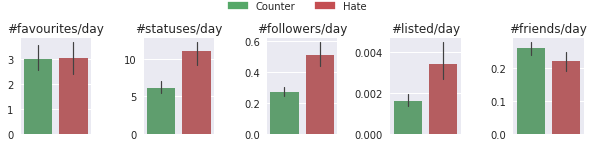

In [142]:
f,axes = plt.subplots(1,5,figsize=(8.5,2))
col=0
for j in ['favourites_count/day','statuses_count/day','followers_count/day','listed_count/day','friends_count/day']:
    _,pvalue1 = ttest_ind(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j])
    _,pvalue2 = mannwhitneyu(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j])
    _,pvalue3 = ttest_ind(user_temp.loc[lexicon_Noncounter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j])
    _,pvalue4 = mannwhitneyu(user_temp.loc[lexicon_Noncounter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j])
    _,pvalue5 = ttest_ind(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j])
    _,pvalue6 = mannwhitneyu(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j])
    if  pvalue2 < 0.01 or pvalue4 < 0.01 or pvalue6 < 0.01:
#             print("                         ",j)
#             print('Hate----Counter')
#             print(ttest_ind(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j]))
#             print(mannwhitneyu(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_hate_user.keys()][j]))
#             print()
#             print('Counter----NonCounter')
#             print(ttest_ind(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j]))
#             print(mannwhitneyu(user_temp.loc[lexicon_counter_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j]))
#             print()
#             print('Hate----NonCounter')
#             print(ttest_ind(user_temp.loc[lexicon_hate_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j]))
#             print(mannwhitneyu(user_temp.loc[lexicon_hate_user.keys()][j],user_temp.loc[lexicon_Noncounter_user.keys()][j]))
#             print()
            Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(lexicon_Noncounter_user.keys()))],user_temp.loc[lexicon_Noncounter_user.keys()][j].tolist()],columns = ['Users',j])
            counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(lexicon_counter_user.keys()))],user_temp.loc[lexicon_counter_user.keys()][j].tolist()],columns = ['Users',j])
            hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(lexicon_hate_user.keys()))],user_temp.loc[lexicon_hate_user.keys()][j].tolist()],columns = ['Users',j])
            Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
            Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
#             sns.boxplot(x = 'Users',y = j,data = Comb_df,width =0.5 ,linewidth = 1,showfliers = False,ax =axes[col])
            sns.barplot(x = 'Users',y = j,data = Comb_df,errwidth=1.2,ax =axes[col],estimator = np.median,palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
            axes[col].set_xticklabels('')
            axes[col].set_xlabel('')
            axes[col].set_ylabel('')
            axes[col].set_title('#'+re.findall(r'[a-zA-Z]+',j)[0]+'/'+re.findall(r'[a-zA-Z]+',j)[2])
            col+=1
            
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#c44e52', label='Hate')
blue_patch = mpatches.Patch(color='#4c72b0', label='NonCounter')
green_patch = mpatches.Patch(color='#55a868', label='Counter')
f.legend(handles=[green_patch,red_patch],loc=9,ncol=3, frameon=False, borderaxespad =-0.25)
f.subplots_adjust(top=2)
f.tight_layout()
f.savefig('Images/UserHistory_Barplots.eps', format='eps')
plt.show()

In [102]:
(user_temp.loc[lexicon_hate_user.keys()]['verified']==1).sum() , (user_temp.loc[lexicon_counter_user.keys()]['verified']==1).sum(),(user_temp.loc[lexicon_Noncounter_user.keys()]['verified']==1).sum() 

(18, 7, 0)

In [103]:
# ############################ According to certain Hues #########################
# sns.set()
# counter_df = pd.DataFrame(np.c_[np.array(['Counter' for i in range(len(user_temp.loc[lexicon_counter_user.keys()]['followers_count'].values))]),user_temp.loc[lexicon_counter_user.keys()][['followers_count','favourites_count','statuses_count','friends_count','listed_count','protected','verified']].values],columns = ['category','followers_count','favourites_count','statuses_count','friends_count','listed_count','protected','verified'])
# hate_df = pd.DataFrame(np.c_[np.array(['Hate' for i in range(len(user_temp.loc[lexicon_hate_user.keys()]['followers_count'].values))]),user_temp.loc[lexicon_hate_user.keys()][['followers_count','favourites_count','statuses_count','friends_count','listed_count','protected','verified']].values],columns = ['category','followers_count','favourites_count','statuses_count','friends_count','listed_count','protected','verified'])
# non_counter_df = pd.DataFrame(np.c_[np.array(['Non-Counter' for i in range(len(user_temp.loc[lexicon_Noncounter_user.keys()]['followers_count'].values))]),user_temp.loc[lexicon_Noncounter_user.keys()][['followers_count','favourites_count','statuses_count','friends_count','listed_count','protected','verified']].values],columns = ['category','followers_count','favourites_count','statuses_count','friends_count','listed_count','protected','verified'])
# df = pd.concat([counter_df,hate_df,non_counter_df],ignore_index = True)
# df = df.apply(pd.to_numeric, errors='ignore')
# plt.figure(figsize=(3,3.2))
# ax = sns.boxplot(x = 'category',y ='followers_count',hue= 'verified',data =df ,showfliers=False, linewidth=2,width = 0.5)
# plt.show()

# plt.figure(figsize=(3,3.2))
# ax = sns.boxplot(x = 'category',y ='favourites_count',hue= 'verified',data =df ,showfliers=False, linewidth=2,width = 0.5)
# plt.show()

# plt.figure(figsize=(3,3.2))
# ax = sns.boxplot(x = 'category',y ='statuses_count',hue= 'verified',data =df ,showfliers=False, linewidth=2,width = 0.5)
# plt.show()

# plt.figure(figsize=(3,3.2))
# ax = sns.boxplot(x = 'category',y ='friends_count',hue= 'verified',data =df ,showfliers=False, linewidth=2,width = 0.5)
# plt.show()

# plt.figure(figsize=(3,3.2))
# ax = sns.boxplot(x = 'category',y ='listed_count',hue= 'verified',data =df ,showfliers=False, linewidth=2,width = 0.5)
# plt.show()

In [104]:
user_temp['verified'].values.tolist().count(False)

1827

## Date Based Analysis :

In [105]:
from datetime import datetime
from dateutil import relativedelta
from datetime import datetime
all_dates = [j for j in list([i[0] for i in user_temp['date'].values.tolist()])]
hate_dates = [j for j in list([i[0] for i in user_temp.loc[lexicon_hate_user,'date'].values.tolist()])]
counter_dates =[j for j in list([i[0] for i in user_temp.loc[lexicon_counter_user,'date'].values.tolist()])]
Non_counter_dates =[j for j in list([i[0] for i in user_temp.loc[lexicon_Noncounter_user,'date'].values.tolist()])]
# from datetime import datetime
# counter_dates = [datetime(int(re.findall('\w+',i)[0]),int(re.findall('\w+',i)[1]),int(re.findall('\w+',i)[2])) for i in counter_dates] 
# hate_dates = [datetime(int(re.findall('\w+',i)[0]),int(re.findall('\w+',i)[1]),int(re.findall('\w+',i)[2])) for i in hate_dates]
def get_time_dict(l):
    months = [] 
#     for i in range(130):
#         months[i] = 0
    for date in l:
        date1 = datetime.strptime(date, '%Y-%m-%d')
        date2 = datetime.strptime('2018-09-01', '%Y-%m-%d')
        r = relativedelta.relativedelta(date2, date1)
        months.append(r.months + (r.years+1)*12)
#         if r.months + (r.years+1)*12 not in  months.keys():
#             months[r.months + (r.years+1)*12] = 1
#         else:
#             months[r.months + (r.years+1)*12] += 1
    return months
hate_dates_list = get_time_dict(hate_dates)
counter_dates_list = get_time_dict(counter_dates)
Noncounter_dates_list = get_time_dict(Non_counter_dates)

In [106]:
############################## Hate Dates before or in 2007#####################################
h2,c2,nc2 = [],[],[]
for i in hate_dates:
    if int(re.findall(r'\w+',i)[0])<=2017 and int(re.findall(r'\w+',i)[1])<12:
        h2.append(i)
print(len(h2))
print()
for i in counter_dates:
    if int(re.findall(r'\w+',i)[0])<=2017 and int(re.findall(r'\w+',i)[1])<12:
        c2.append(i)
print(len(c2))
print()
for i in Non_counter_dates:
    if int(re.findall(r'\w+',i)[0])<=2017 and int(re.findall(r'\w+',i)[1])<12:
        nc2.append(i)
print(len(nc2))

450

1039

171


In [107]:
# hate_dates_Binny = []
# counter_dates_Binny = []
# for i in hate_dates:
#     hate_dates_Binny.append(int(re.findall(r'\w+',i)[0]))
# for i in counter_dates:
#     counter_dates_Binny.append(int(re.findall(r'\w+',i)[0]))
# np.savetxt('hate_dates_Binny.txt',hate_dates_Binny,fmt = '%1.0f')
# np.savetxt('counter_dates_Binny.txt',counter_dates_Binny,fmt = '%1.0f')

### Statistical tests :

In [108]:
print('Hate----Counter')
print(mannwhitneyu(hate_dates_list,counter_dates_list),end='\n\n')
print('Counter----NonCounter')
print(mannwhitneyu(Noncounter_dates_list,counter_dates_list),end='\n\n')
print('Hate----NonCounter')
print(mannwhitneyu(Noncounter_dates_list,hate_dates_list))

Hate----Counter
MannwhitneyuResult(statistic=270246.0, pvalue=0.004340122482279647)

Counter----NonCounter
MannwhitneyuResult(statistic=95929.5, pvalue=0.005184571933454095)

Hate----NonCounter
MannwhitneyuResult(statistic=37801.5, pvalue=1.0331586401625391e-05)


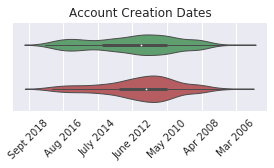

In [143]:
sns.set()
Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(Noncounter_dates_list))],Noncounter_dates_list],columns = ['Users','Months'])
counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(counter_dates_list))],counter_dates_list],columns = ['Users','Months'])
hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(hate_dates_list))],hate_dates_list],columns = ['Users','Months'])
Comb_df = pd.concat([counter_df,hate_df],ignore_index = True)
Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
plt.figure(figsize = (4,2.5))
ax = sns.violinplot(y = 'Users',x ='Months',data = Comb_df,width =0.6 ,linewidth =1 ,showfliers = False,palette = {'Hate':'#c44e52' ,'Counter':'#55a868'})
ax.set_yticklabels('')
ax.set_xticklabels(['','Sept 2018','Aug 2016','July 2014','June 2012','May 2010','Apr 2008','Mar 2006'])
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation = 45)
plt.title('Account Creation Dates')
plt.tight_layout()
plt.savefig('Images/Creation_Dates.eps', format='eps')
plt.show()

In [110]:
# import datetime as dt
# Noncounter_dates_list = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in Non_counter_dates]
# counter_dates_list = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in counter_dates]
# hate_dates_list = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in hate_dates]
# sns.set()
# Noncounter_df = pd.DataFrame(np.c_[['NonCounter' for i in range(len(Noncounter_dates_list))],Noncounter_dates_list],columns = ['Users','Dates'])
# counter_df = pd.DataFrame(np.c_[['Counter' for i in range(len(counter_dates_list))],counter_dates_list],columns = ['Users','Dates'])
# hate_df = pd.DataFrame(np.c_[['Hate' for i in range(len(hate_dates_list))],hate_dates_list],columns = ['Users','Dates'])
# Comb_df = pd.concat([Noncounter_df,counter_df,hate_df],ignore_index = True)
# Comb_df = Comb_df.apply(pd.to_numeric, errors='ignore')
# plt.figure(figsize = (5,1.5))
# ax = sns.violinplot(y = 'Users',x ='Dates',data = Comb_df,width =0.6 ,linewidth =1 ,showfliers = False)
# ax.set_yticklabels('')
# plt.ylabel('')
# plt.title('Creation Months from 1-Sept-2018')
# # plt.savefig('Images/'+ 'Creation_Dates' +'.eps', format='eps')
# plt.show()

In [111]:
np.mean(hate_dates_list),np.mean(counter_dates_list),np.mean(Noncounter_dates_list)

(80.60510805500982, 75.87359307359307, 69.97340425531915)

##  Likes, retweets :

In [112]:
with open('Refined_Project_Dataset/Hate_tweets_likes_retweets.json','r') as fp:
    hate_tweets_likes_retweets = json.load(fp)
with open('Refined_Project_Dataset/Counter_replies_retweets_likes.json','r') as fp:
    counter_tweets_likes_retweets = json.load(fp)
with open('Refined_Project_Dataset/NonCounter_replies_retweets_likes.json','r') as fp:
    Noncounter_tweets_likes_retweets = json.load(fp)

In [113]:
len(hate_tweets_likes_retweets),len(counter_tweets_likes_retweets),len(Noncounter_tweets_likes_retweets)

(377, 841, 140)

In [ ]:
hate_tweets_likes_retweets[5],counter_tweets_likes_retweets[10]

In [115]:
##### No. of Verified Users :
len(user_temp[user_temp['verified']==1].index.tolist())

25

## For Verified Users : 

In [116]:
###### For Hate Users
hId,cId = [],[]
for i in  hate_usernames.intersection(set(user_temp[user_temp['verified']==1].index.tolist())):
    hId.append(df[df['original_tweetusername']==i]['original_tweetid'].tolist()[0])
for i in  counter_usernames.intersection(set(user_temp[user_temp['verified']==1].index.tolist())):
    cId.append(df[df['replier_user_name']==i]['reply_id'].tolist()[0])
len(hId),len(cId)

(18, 7)

## Verified Users /For all Users:

In [117]:
#### For Hate User:
retweets_count,likes_count,replies_count = 0,0,0
retweets_list,likes_list,replies_list = [],[],[]
for each_dict in hate_tweets_likes_retweets:
        retweets_count+= int(each_dict['hate_no_retweets'])
        retweets_list.append(int(each_dict['hate_no_retweets']))
        replies_count+= int(each_dict['hate_no_replies'])
        replies_list.append(int(each_dict['hate_no_replies']))
        likes_count+= int(each_dict['hate_no_likes'])
        likes_list.append(int(each_dict['hate_no_likes']))
print('All Hates:\n retweet_count {}  replies_count {} likes_count {}\n retweet_mean {}  replies_mean {} likes_mean {} \n retweet_median {}  replies_median {} likes_medain {}\n'.format(retweets_count,replies_count,likes_count,np.mean(retweets_list),np.mean(replies_list),np.mean(likes_list),np.median(retweets_list),np.median(replies_list),np.median(likes_list))) 
# print(len(likes_list))
#### For Counter User:
retweets_count,likes_count,replies_count = 0,0,0
retweets_list,likes_list,replies_list = [],[],[]
for each_dict in counter_tweets_likes_retweets:
        retweets_count+= int(each_dict['counter_no_retweets'])
        retweets_list.append(int(each_dict['counter_no_retweets']))
        replies_count+= int(each_dict['counter_no_replies'])
        replies_list.append(int(each_dict['counter_no_replies']))
        likes_count+= int(each_dict['counter_no_likes'])
        likes_list.append(int(each_dict['counter_no_likes']))
print('All counter:\n retweet_count {}  replies_count {} likes_count {}\n retweet_mean {}  replies_mean {} likes_mean {} \n retweet_median {}  replies_median {} likes_medain {}\n'.format(retweets_count,replies_count,likes_count,np.mean(retweets_list),np.mean(replies_list),np.mean(likes_list),np.median(retweets_list),np.median(replies_list),np.median(likes_list)))
# print(len(likes_list))
#### For NonCounter User:
retweets_count,likes_count,replies_count = 0,0,0
retweets_list,likes_list,replies_list = [],[],[]
for each_dict in Noncounter_tweets_likes_retweets:
        retweets_count+= int(each_dict['counter_no_retweets'])
        retweets_list.append(int(each_dict['counter_no_retweets']))
        replies_count+= int(each_dict['counter_no_replies'])
        replies_list.append(int(each_dict['counter_no_replies']))
        likes_count+= int(each_dict['counter_no_likes'])
        likes_list.append(int(each_dict['counter_no_likes']))
print('All Noncounter:\n retweet_count {}  replies_count {} likes_count {}\n retweet_mean {}  replies_mean {} likes_mean {} \n retweet_median {}  replies_median {} likes_medain {}'.format(retweets_count,replies_count,likes_count,np.mean(retweets_list),np.mean(replies_list),np.mean(likes_list),np.median(retweets_list),np.median(replies_list),np.median(likes_list)))
# print(len(likes_list))

All Hates:
 retweet_count 6723  replies_count 3596 likes_count 23046
 retweet_mean 17.83289124668435  replies_mean 9.538461538461538 likes_mean 61.12997347480106 
 retweet_median 0.0  replies_median 3.0 likes_medain 2.0

All counter:
 retweet_count 569  replies_count 389 likes_count 9690
 retweet_mean 0.6765755053507729  replies_mean 0.4625445897740785 likes_mean 11.521997621878716 
 retweet_median 0.0  replies_median 0.0 likes_medain 0.0

All Noncounter:
 retweet_count 20  replies_count 44 likes_count 281
 retweet_mean 0.14285714285714285  replies_mean 0.3142857142857143 likes_mean 2.007142857142857 
 retweet_median 0.0  replies_median 0.0 likes_medain 0.0


In [ ]:
Noncounter_tweets_likes_retweets[0]

In [119]:
#### For Hate User:
retweets_count,likes_count,replies_count = 0,0,0
retweets_list,likes_list,replies_list = [],[],[]
for each_dict in hate_tweets_likes_retweets:
    if int(each_dict['hate_id']) in hate_ids_pic:
        retweets_count+= int(each_dict['hate_no_retweets'])
        retweets_list.append(int(each_dict['hate_no_retweets']))
        replies_count+= int(each_dict['hate_no_replies'])
        replies_list.append(int(each_dict['hate_no_replies']))
        likes_count+= int(each_dict['hate_no_likes'])
        likes_list.append(int(each_dict['hate_no_likes']))
print('Pic Hates:\n retweet_count {} replies_count {} likes_count {}\n retweet_mean {}  replies_mean {} likes_mean {} \n retweet_median {}  replies_median {} likes_medain {}\n'.format(retweets_count,replies_count,likes_count,np.mean(retweets_list),np.mean(replies_list),np.mean(likes_list),np.median(retweets_list),np.median(replies_list),np.median(likes_list))) 
# print(len(likes_list))
#### For Counter User:
retweets_count,likes_count,replies_count = 0,0,0
retweets_list,likes_list,replies_list = [],[],[]
for each_dict in counter_tweets_likes_retweets:
    if int(each_dict['counter_id']) in counter_ids_pic:
        retweets_count+= int(each_dict['counter_no_retweets'])
        retweets_list.append(int(each_dict['counter_no_retweets']))
        replies_count+= int(each_dict['counter_no_replies'])
        replies_list.append(int(each_dict['counter_no_replies']))
        likes_count+= int(each_dict['counter_no_likes'])
        likes_list.append(int(each_dict['counter_no_likes']))
print('Pic counter:\n retweet_count {} replies_count {} likes_count {}\n retweet_mean {}  replies_mean {} likes_mean {} \n retweet_median {}  replies_median {} likes_medain {}\n'.format(retweets_count,replies_count,likes_count,np.mean(retweets_list),np.mean(replies_list),np.mean(likes_list),np.median(retweets_list),np.median(replies_list),np.median(likes_list)))
# print(len(likes_list))
#### For NonCounter User:
retweets_count,likes_count,replies_count = 0,0,0
retweets_list,likes_list,replies_list = [],[],[]
for each_dict in Noncounter_tweets_likes_retweets:
    if int(each_dict['counter_id']) in NonCounter_ids_pic:
        retweets_count+= int(each_dict['counter_no_retweets'])
        retweets_list.append(int(each_dict['counter_no_retweets']))
        replies_count+= int(each_dict['counter_no_replies'])
        replies_list.append(int(each_dict['counter_no_replies']))
        likes_count+= int(each_dict['counter_no_likes'])
        likes_list.append(int(each_dict['counter_no_likes']))
print('Pic Noncounter:\n retweet_count {} replies_count {} likes_count {}\n retweet_mean {}  replies_mean {} likes_mean {} \n retweet_median {}  replies_median {} likes_medain {}'.format(retweets_count,replies_count,likes_count,np.mean(retweets_list),np.mean(replies_list),np.mean(likes_list),np.median(retweets_list),np.median(replies_list),np.median(likes_list)))
# print(len(likes_list))

Pic Hates:
 retweet_count 1116 replies_count 1323 likes_count 4443
 retweet_mean 139.5  replies_mean 165.375 likes_mean 555.375 
 retweet_median 13.5  replies_median 5.5 likes_medain 22.5

Pic counter:
 retweet_count 75 replies_count 25 likes_count 858
 retweet_mean 0.8064516129032258  replies_mean 0.26881720430107525 likes_mean 9.225806451612904 
 retweet_median 0.0  replies_median 0.0 likes_medain 2.0

Pic Noncounter:
 retweet_count 3 replies_count 7 likes_count 64
 retweet_mean 0.0967741935483871  replies_mean 0.22580645161290322 likes_mean 2.064516129032258 
 retweet_median 0.0  replies_median 0.0 likes_medain 1.0


## Retweet/Replies/Likes count per category [For all Users]:

In [169]:
for i in range(12):
    retweets_count,likes_count,replies_count = 0,0,0
    retweets_median,likes_median,replies_median = [],[],[]
    if i==10:
        continue
    elif i==0:
        for each_dict in Noncounter_tweets_likes_retweets:
            retweets_count+=int(each_dict['counter_no_retweets'])
            retweets_median.append(int(each_dict['counter_no_retweets']))
            likes_count+=int(each_dict['counter_no_likes'])
            likes_median.append(int(each_dict['counter_no_likes']))
            replies_count+=int(each_dict['counter_no_replies'])
            replies_median.append(int(each_dict['counter_no_replies']))
        count = len(Noncounter_tweets_likes_retweets)
        print('Category{}'.format(i))
        print('Num_Tweets: ',count)
        print('retweets_count: {} likes_count: {} replies_count: {}'.format(retweets_count,likes_count,replies_count))
        print('retweets_count_avg: {} likes_count_avg: {} replies_count_avg: {}'.format(retweets_count/count,likes_count/count,replies_count/count))  
        print('retweets_median: {} likes_median: {} replies_median: {}'.format(np.median(retweets_median),np.median(likes_median),np.median(replies_median)))
        print()
    else:
        count=0
        for each_dict in counter_tweets_likes_retweets:
            if each_dict['counter_id'] in df[df['tag']==str(i)]['reply_id'].astype(str).tolist():
                retweets_count+=int(each_dict['counter_no_retweets'])
                retweets_median.append(int(each_dict['counter_no_retweets']))
                likes_count+=int(each_dict['counter_no_likes'])
                likes_median.append(int(each_dict['counter_no_likes']))
                replies_count+=int(each_dict['counter_no_replies'])
                replies_median.append(int(each_dict['counter_no_replies']))
                count += 1
        print('Category{}'.format(i))
        print('Num_Tweets: ',count)
        print('retweets_count: {} likes_count: {} replies_count: {}'.format(retweets_count,likes_count,replies_count))
        print('retweets_count_avg: {} likes_count_avg: {} replies_count_avg: {}'.format(retweets_count/count,likes_count/count,replies_count/count))                             
        print('retweets_median: {} likes_median: {} replies_median: {}'.format(np.median(retweets_median),np.median(likes_median),np.median(replies_median)))
        print()

Category0
Num_Tweets:  140
retweets_count: 20 likes_count: 281 replies_count: 44
retweets_count_avg: 0.14285714285714285 likes_count_avg: 2.007142857142857 replies_count_avg: 0.3142857142857143
retweets_median: 0.0 likes_median: 0.0 replies_median: 0.0

Category1
Num_Tweets:  38
retweets_count: 3 likes_count: 76 replies_count: 15
retweets_count_avg: 0.07894736842105263 likes_count_avg: 2.0 replies_count_avg: 0.39473684210526316
retweets_median: 0.0 likes_median: 0.5 replies_median: 0.0

Category2
Num_Tweets:  61
retweets_count: 11 likes_count: 387 replies_count: 40
retweets_count_avg: 0.18032786885245902 likes_count_avg: 6.344262295081967 replies_count_avg: 0.6557377049180327
retweets_median: 0.0 likes_median: 0.0 replies_median: 0.0

Category3
Num_Tweets:  22
retweets_count: 346 likes_count: 7652 replies_count: 20
retweets_count_avg: 15.727272727272727 likes_count_avg: 347.8181818181818 replies_count_avg: 0.9090909090909091
retweets_median: 0.0 likes_median: 1.0 replies_median: 0.0

C